# House Prices

## Introduction and Overview
### Introduction
### Overview of the dataset

## 1.EDA

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os
from scipy.stats import kruskal

In [2]:
#prints the version of the modules
print("Seaborn version: {}".format(sns.__version__))
print("Pandas version: {}".format(pd.__version__))
print("Numpy version: {}".format(np.__version__))

Seaborn version: 0.13.2
Pandas version: 2.0.3
Numpy version: 1.24.4


In [3]:
def print_nan_columns(df, col_names=None):
    '''' prints the sum of nans in each col
    Args:
    df: the dataframe to compute the nans on
    col_names: a list with column names
    Returns:
    None '''
    
    # if col_names has not been provided extract all of the columns
    col_names = df.columns if type(col_names) == type(None) else col_names

    #compute the sum of all nans in each column
    null_sum = df[col_names].isnull().sum()

    #set the print mode to full
    with pd.option_context('display.max_rows', None, 'display.max_columns', None):
        #print only columns with Nans
        print(null_sum[null_sum > 0])

In [4]:
def change_list(current_list, new_list, op=1):
    ''' makes a change to the the current_list with the change_list according to give operation op.
    To be used on the column names lists 
    Args:
    current_list: the list that contains current anmes
    new_list: the list the will be used to operate on the current list
    op: the operation to be used either union or substraction using a boolean  respectively(1 or 0)
    Return:
    changed_list: the changed list
    '''
    current_set, new_set = set(current_list), set(new_list)
    changed_set = current_set | new_set if op else current_set - new_set
    changed_list = list(changed_set)

    return changed_list

In [5]:
def display_plot(df, col_names, type_of_plot, exclude_names=[]):
    ''' creates and displays countplots
    Args:
    df: the dataframe used to make the plots
    col_names:  list of the column names of interest
    type_of_plot: the type of plot (count C, Scatter S, Box B, Hist H)
    exclude_names: list of column names we want to exclude
    Returns:
    None '''

    #remove names that not of interest
    col_names = [col_name for col_name in col_names if col_name not in exclude_names]
    
    # the number of plots needed to generated
    num_plots = len(col_names)
    
    # Calculate the number of rows and columns for subplots dynamically
    
    num_cols = 3  # Set the number of columns per row (3) is generally good for visualization
    
    num_rows = (num_plots + num_cols - 1) // num_cols

    
    fig, axes  = plt.subplots(num_rows, num_cols, figsize=(12, 6*num_rows))
    axes = axes.flatten()

    # labels and title related to the plots
    x_label, y_label, title = None, None, None
    #iterate over the names and populate the axes with plots
    
    for i, name in enumerate(col_names):

        if type_of_plot == 'C':
            sns.countplot(x=df[name], ax=axes[i])

            #set the labels
            x_label = name
            y_label = 'Frequency'
            title = f'Count Plot of {name}'
        
        # the target variable is 'SalePrice'
        if type_of_plot == 'B':
            sns.boxplot(x=df[name], y=df['SalePrice'], ax=axes[i])

            #set the labels
            x_label = name
            y_label = 'SalePrice'
            title = f'Box Plot of {name} and SalePrice'
            
        # the target variable is 'SalePrice'
        if type_of_plot == 'S':
            sns.scatterplot(x=df[name], y=df['SalePrice'], ax=axes[i])

            #set the labels
            x_label = name
            y_label = 'SalePrice'
            title = f'Scatter Plot of {name} and SalePrice'

       
        if type_of_plot == 'H':
            sns.histplot(data=df[name], kde=True, ax=axes[i])

            #set the labels
            x_label = name
            y_label = 'Frequency'
            title = f'The Distrubition of {name}'
            
        
        axes[i].set_xlabel(x_label)  # Set x-axis label
        axes[i].set_ylabel(y_label)  # Set y-axis label
        axes[i].set_title(title)  # Set plot title
            
    #Hide empty plots
    for i in range(num_cols*num_rows, num_plots, -1):
        axes[i-1].set_visible(False)
        
    plt.tight_layout()
    plt.show()

    

### Dataloading and preprocessing

#### Setting up the paths to the dataset

In [6]:
print("Current dir: {}".format(os.getcwd()))

Current dir: C:\Users\AliMu\Programming Projects\DataScience\House Prices


In [7]:
dataset_path = os.path.join(os.getcwd(), 'dataset')

In [8]:
print("Files in the dataset")
for file in os.listdir(dataset_path):
    print(file)

Files in the dataset
data_description.txt
sample_submission.csv
test.csv
train.csv


In [9]:
def load_dataset():
    ''' loads the dataset 
    Returns:
    train_df, test_df'''    

    #the dataset path
    dataset_path = os.path.join(os.getcwd(), 'dataset')
    
    #initialize the train and test paths
    train_path = os.path.join(dataset_path, 'train.csv')
    test_path = os.path.join(dataset_path, 'test.csv')
    
    #load the datasets
    train_df = pd.read_csv(train_path, index_col='Id')
    test_df = pd.read_csv(test_path, index_col='Id')

    return train_df, test_df

In [10]:
#loading the dataset
train_df, test_df = load_dataset()

#### Loading the dataset

#### An overview look at the datasets

In [11]:
#display the first five rows of the train dataset
train_df.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                    
1           60       RL         65.0     8450   Pave   NaN      Reg   
2           20       RL         80.0     9600   Pave   NaN      Reg   
3           60       RL         68.0    11250   Pave   NaN      IR1   
4           70       RL         60.0     9550   Pave   NaN      IR1   
5           60       RL         84.0    14260   Pave   NaN      IR1   

   LandContour Utilities LotConfig  ... PoolArea PoolQC Fence MiscFeature  \
Id                                  ...                                     
1          Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
2          Lvl    AllPub       FR2  ...        0    NaN   NaN         NaN   
3          Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
4          Lvl    AllPub    Corner  ...        0    NaN   NaN         NaN   
5          Lvl    AllPub       FR2  ...        0    NaN   NaN         NaN   

   MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
Id                                                             
1        0      2    2008        WD         Normal     208500  
2        0      5    2007        WD         Normal     181500  
3        0      9    2008        WD         Normal     223500  
4        0      2    2006        WD        Abnorml     140000  
5        0     12    2008        WD         Normal     250000  

[5 rows x 80 columns]

In [12]:
#display info to get an overview of all the columns, datatype, indirectly the number of Nans
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuilt    

In [13]:
# print sum of nans accross all columns
original_nan_columns = train_df.isnull().sum()
print_nan_columns(train_df)

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


##### Note: 
__PoolQC__, __Fence__, __MiscFeature__, __Alley__, __MasVnrType__, __FireplaceQu__ has a very high ratio of missing values. 


#### Split the dataset into numerical and categorical (ordinal and nominal)
Consulting both the data_description.txt and Dtype of each column it is possible to discern what type of data it is

In [15]:
#Using these variable names we can skip creating views of the dataframe
#we skip 'Id' column immediatly it provides no information to the task at hand.

               
ordinal_names = ['OverallQual', 'OverallCond', 'GarageQual', 'ExterQual', 'KitchenQual', 'BsmtQual', 'LandSlope', 'ExterCond',
                'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'GarageCond', 'PoolQC', 
                 'Fence', 'SaleCondition', 'GarageFinish', 'FireplaceQu', 'Functional']

nominal_names = ['MSSubClass', 'MoSold', 'MSZoning', 'Street',
                'Alley', 'RoofStyle', 'LotConfig', 'Utilities', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
                'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'CentralAir', 
                'Electrical', 'SaleType', 'MiscFeature', 'PavedDrive', 'GarageType', 'LandContour', 'LotShape']

numerical_names = change_list(list(train_df.columns), ordinal_names + nominal_names, 0)


#optional
# print("\033[1mOrdinal_names\033[0m\n{}".format("\n".join(ordinal_names)))
# print("\033[1mNominal_names\033[0m\n{}".format("\n".join(nominal_names)))
# print("\033[1mNumerical_names\033[0m\n{}".format("\n".join(numerical_names)))

#### Split numerical into continous and discrete
Consulting the data_description and the results above it is possible to split the columns into continous and discrete

In [16]:
dnum_names = ['BsmtFullBath', 'BsmtHalfBath','FullBath', 'HalfBath', 'BedroomAbvGr', 
              'TotRmsAbvGrd', 'KitchenAbvGr', 'Fireplaces', 
              'GarageCars', 'GarageYrBlt','YearBuilt', 'YearRemodAdd', 'YrSold']
cnum_names = change_list(numerical_names, dnum_names, 0)

#optional
#print("\033[1mContinous numerical names\033[0m\n{}".format("\n".join(cnum_names)))
#print("\033[1mDiscrete numerical names\033[0m\n{}".format("\n".join(dnum_names)))

### Numerical Data Exploration

##### Note:
The columns consist of both continuous and discrete data.

#### Handle Nans in Numerical data
__LotFrontage__: is the only continous numerical variable with Nans.
259 entries of 1460 are Nans. This is a significant subset and therefore a simple method like 'median' does not suffice
__GarageYrBlt__: is the only discrete numerical variable with Nans
89 entries of 1460 are Nans. This is a small subset, allowing for more forgiving imputing methods. 
However since the information is very specific special consideration are taken.

In [17]:
#print the Nans across continous numerical data
print_nan_columns(train_df, cnum_names)

MasVnrArea       8
LotFrontage    259
dtype: int64


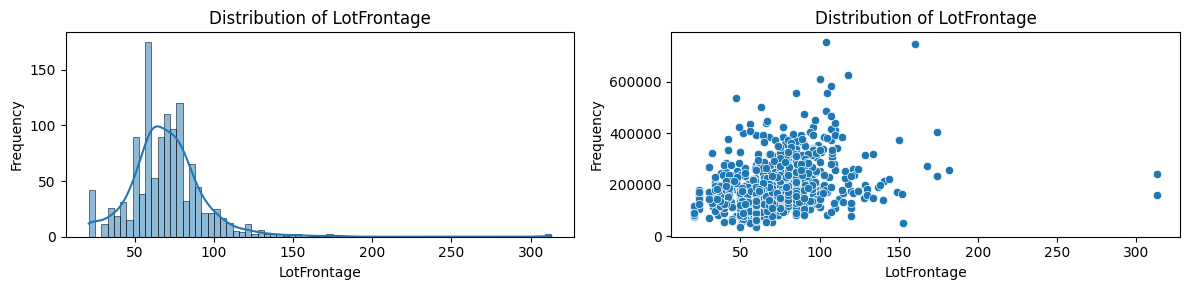

In [18]:
#Plot the Lotfraontage, to see what kind of method is good for imputing the Nan values
fig, axes = plt.subplots(1, 2, figsize=(12, 3))
axes = axes.flatten()

name = 'LotFrontage'
sns.histplot(data=train_df[name], kde=True, ax=axes[0])
axes[0].set_xlabel(name)
axes[0].set_ylabel('Frequency')
axes[0].set_title("Distribution of {}".format(name))

sns.scatterplot(x=train_df[name], y=train_df['SalePrice'], ax=axes[1])
axes[1].set_xlabel(name)
axes[1].set_ylabel('Frequency')
axes[1].set_title("Distribution of {}".format(name))

plt.tight_layout()
plt.show()


##### Note:
There Lotfrontage has pretty normal distrubition, and the data seems to be correlating with target_variable.


#### Impute with interpolation

Lets investigate what variables can be used to interpolate the missing LotFontage values

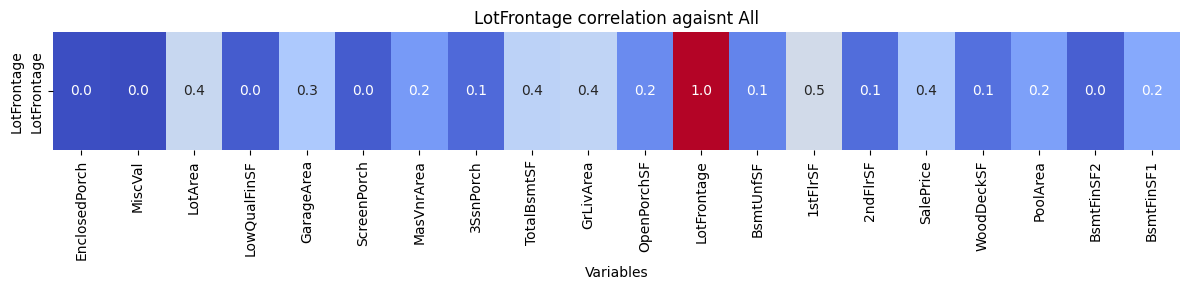

In [19]:
#Lets see the correlation between LotFrontage and all the other variable

fig, axes = plt.subplots(1,1, figsize=(12,3))
sns.heatmap(train_df[cnum_names].corr()[['LotFrontage']].T, cmap='coolwarm', annot=True, fmt='.1f', cbar=False, ax=axes)
axes.set_title('LotFrontage correlation agaisnt All')
axes.set_xlabel('Variables')
axes.set_ylabel('LotFrontage')
plt.tight_layout()
plt.show()


##### Note:
if we break down the results above, we can summarize that LotArea is the only variable that actually has any logical connection to the LotFrontage. 

In [20]:
from sklearn.linear_model import LinearRegression

def interpolate_lotfrontage(df):
    ''' interpolates the LotFrontage on LotArea
    df: the dataframe being operated o
    returns:
    df_interpolated: the dataframe with the interpolate lotfrontage'''

    df = df.copy()
    df_nan = df[df['LotFrontage'].isnull()]
    df_nonan = df.dropna(subset=['LotArea', 'LotFrontage'])
    
    regression_model = LinearRegression()
    regression_model.fit(df_nonan[['LotArea']], df_nonan[['LotFrontage']])

    predicted_lotfrontage_values = regression_model.predict(df_nan[['LotArea']])

    df.loc[df['LotFrontage'].isnull(), 'LotFrontage'] = predicted_lotfrontage_values.flatten()

    interpolated_df = df
    
    return interpolated_df
    
    

In [21]:
#interpolate the lotfrontage misisng valus
train_df = interpolate_lotfrontage(train_df)

In [22]:
#final check if all values has been imputed
print_nan_columns(train_df, ['LotFrontage'])

Series([], dtype: int64)


In [23]:
#Since GarageYrBlt is very specific information lets investigate closely related information
with pd.option_context('display.max_rows', None):
    print(train_df[['GarageYrBlt', 'GarageArea', 'GarageCars', 'HouseStyle']][train_df['GarageYrBlt'].isnull()])

      GarageYrBlt  GarageArea  GarageCars HouseStyle
Id                                                  
40            NaN           0           0     1Story
49            NaN           0           0     2Story
79            NaN           0           0     1Story
89            NaN           0           0     1.5Fin
90            NaN           0           0     1Story
100           NaN           0           0     1Story
109           NaN           0           0     1.5Fin
126           NaN           0           0     1.5Fin
128           NaN           0           0     1.5Unf
141           NaN           0           0     1Story
149           NaN           0           0     1Story
156           NaN           0           0     1.5Fin
164           NaN           0           0     1.5Unf
166           NaN           0           0     1.5Fin
199           NaN           0           0     2.5Fin
211           NaN           0           0     1Story
242           NaN           0           0     

###### Note:
From the results above we can clearly see that the Nan relates to properties that does not have a garage
Dropping these column would essentially remove any properties that does not have garage which is not an option.

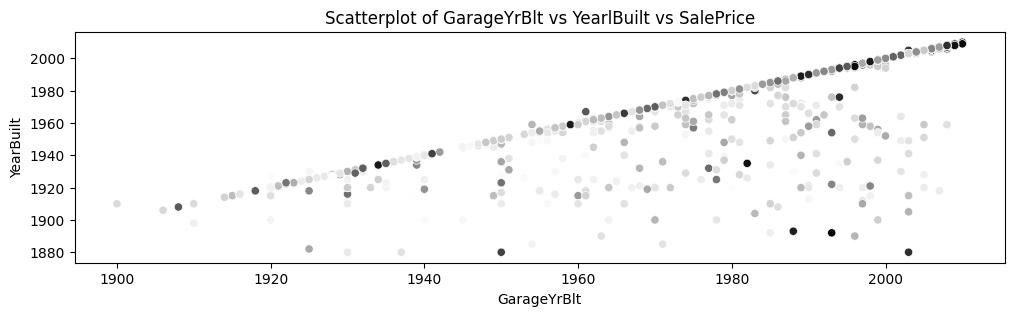

In [24]:
#Let see the relationship between YearBlt and GarageYrblt and SalePrice
grayscale_palette = sns.color_palette("Greys", train_df['SalePrice'].nunique())
fig, axes = plt.subplots(1,1, figsize=(12,3))
sns.scatterplot(x=train_df['GarageYrBlt'], y=train_df['YearBuilt'], hue=train_df['SalePrice'], palette=grayscale_palette, legend=None, ax=axes)
axes.set_title('Scatterplot of GarageYrBlt vs YearlBuilt vs SalePrice')
axes.set_xlabel('GarageYrBlt')
axes.set_ylabel('YearBuilt')
#plt.tight_layout()
plt.show()

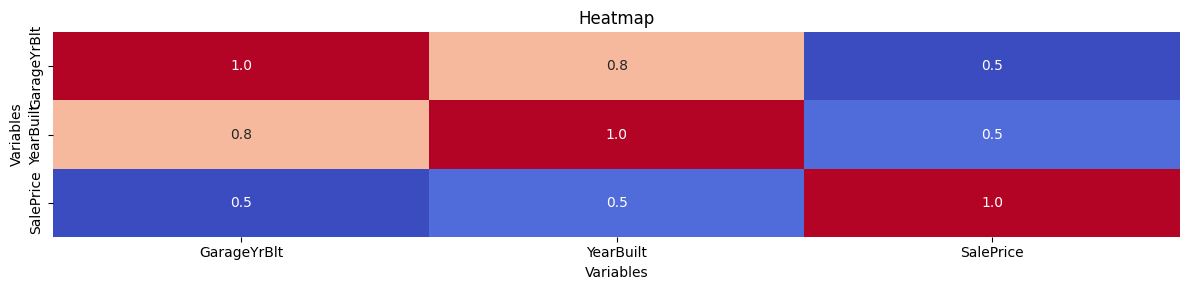

In [25]:
#Lets see the correlation between GarageYrBlt, YearBuilt and SalePrice

fig, axes = plt.subplots(1,1, figsize=(12,3))
sns.heatmap(train_df[['GarageYrBlt', 'YearBuilt', 'SalePrice']].corr(), cmap='coolwarm', annot=True, fmt='.1f', cbar=False, ax=axes)
axes.set_title('Heatmap')
axes.set_xlabel('Variables')
axes.set_ylabel('Variables')
plt.tight_layout()
plt.show()

We clearly see that __YearBuilt__ and __GarageYrBuilt__ is strongly correlated to eachother and somewhat with SalePrice
It is nessacary to drop __GarageYrBuilt__, but since having and not having garage is information that is not contained in __YearBuilt__ and the fact that the garage might have been built at different time. It would be produnt to replace __GarageYrBuilt__ with two categorical variables __HasGarage__ and __AddGarage__

In [26]:
# create 'HasGarage' variable
train_df['HasGarage'] = train_df['GarageYrBlt'].notnull().astype('category')

#create AddGarage
train_df['AddGarage'] = ((train_df['HasGarage']==True) & (train_df['YearBuilt'] != train_df['GarageYrBlt'])).astype('category')

#make changes to name lists
train_df.drop('GarageYrBlt', axis=1, inplace=True)
dnum_names = change_list(dnum_names, ['GarageYrBlt'], 0)
nominal_names = change_list(nominal_names, ['HasGarage', 'AddGarage'])
numerical_names = change_list(numerical_names, ['GarageYrBlt'], 0)

In [27]:
#check the results
with pd.option_context('display.max_rows', None):
    print(train_df[['HasGarage', 'AddGarage', 'GarageArea', 'GarageCars', 'HouseStyle']][:100])

    HasGarage AddGarage  GarageArea  GarageCars HouseStyle
Id                                                        
1        True     False         548           2     2Story
2        True     False         460           2     1Story
3        True     False         608           2     2Story
4        True      True         642           3     2Story
5        True     False         836           3     2Story
6        True     False         480           2     1.5Fin
7        True     False         636           2     1Story
8        True     False         484           2     2Story
9        True     False         468           2     1.5Fin
10       True     False         205           1     1.5Unf
11       True     False         384           1     1Story
12       True     False         736           3     2Story
13       True     False         352           1     1Story
14       True     False         840           3     1Story
15       True     False         352           1     1Sto

In [28]:
#display some descriptiv statistics of the dataset
with pd.option_context('display.max_columns', None):
    print(train_df[numerical_names].describe())

       KitchenAbvGr  EnclosedPorch       MiscVal       YrSold    YearBuilt  \
count   1460.000000    1460.000000   1460.000000  1460.000000  1460.000000   
mean       1.046575      21.954110     43.489041  2007.815753  1971.267808   
std        0.220338      61.119149    496.123024     1.328095    30.202904   
min        0.000000       0.000000      0.000000  2006.000000  1872.000000   
25%        1.000000       0.000000      0.000000  2007.000000  1954.000000   
50%        1.000000       0.000000      0.000000  2008.000000  1973.000000   
75%        1.000000       0.000000      0.000000  2009.000000  2000.000000   
max        3.000000     552.000000  15500.000000  2010.000000  2010.000000   

          HalfBath        LotArea   GarageCars  LowQualFinSF   GarageArea  \
count  1460.000000    1460.000000  1460.000000   1460.000000  1460.000000   
mean      0.382877   10516.828082     1.767123      5.844521   472.980137   
std       0.502885    9981.264932     0.747315     48.623081   213

#### DataVisualization for Discrete Numerical Columns

In [29]:
#convert the datatypes of these columns
for name in dnum_names:
    train_df[name] = train_df[name].astype('category')

We begin by looking at the distrubition of the discrete variables. YearBuilt and YearRemodAdd will be excluded here 
and properly addressed at the categorical section.

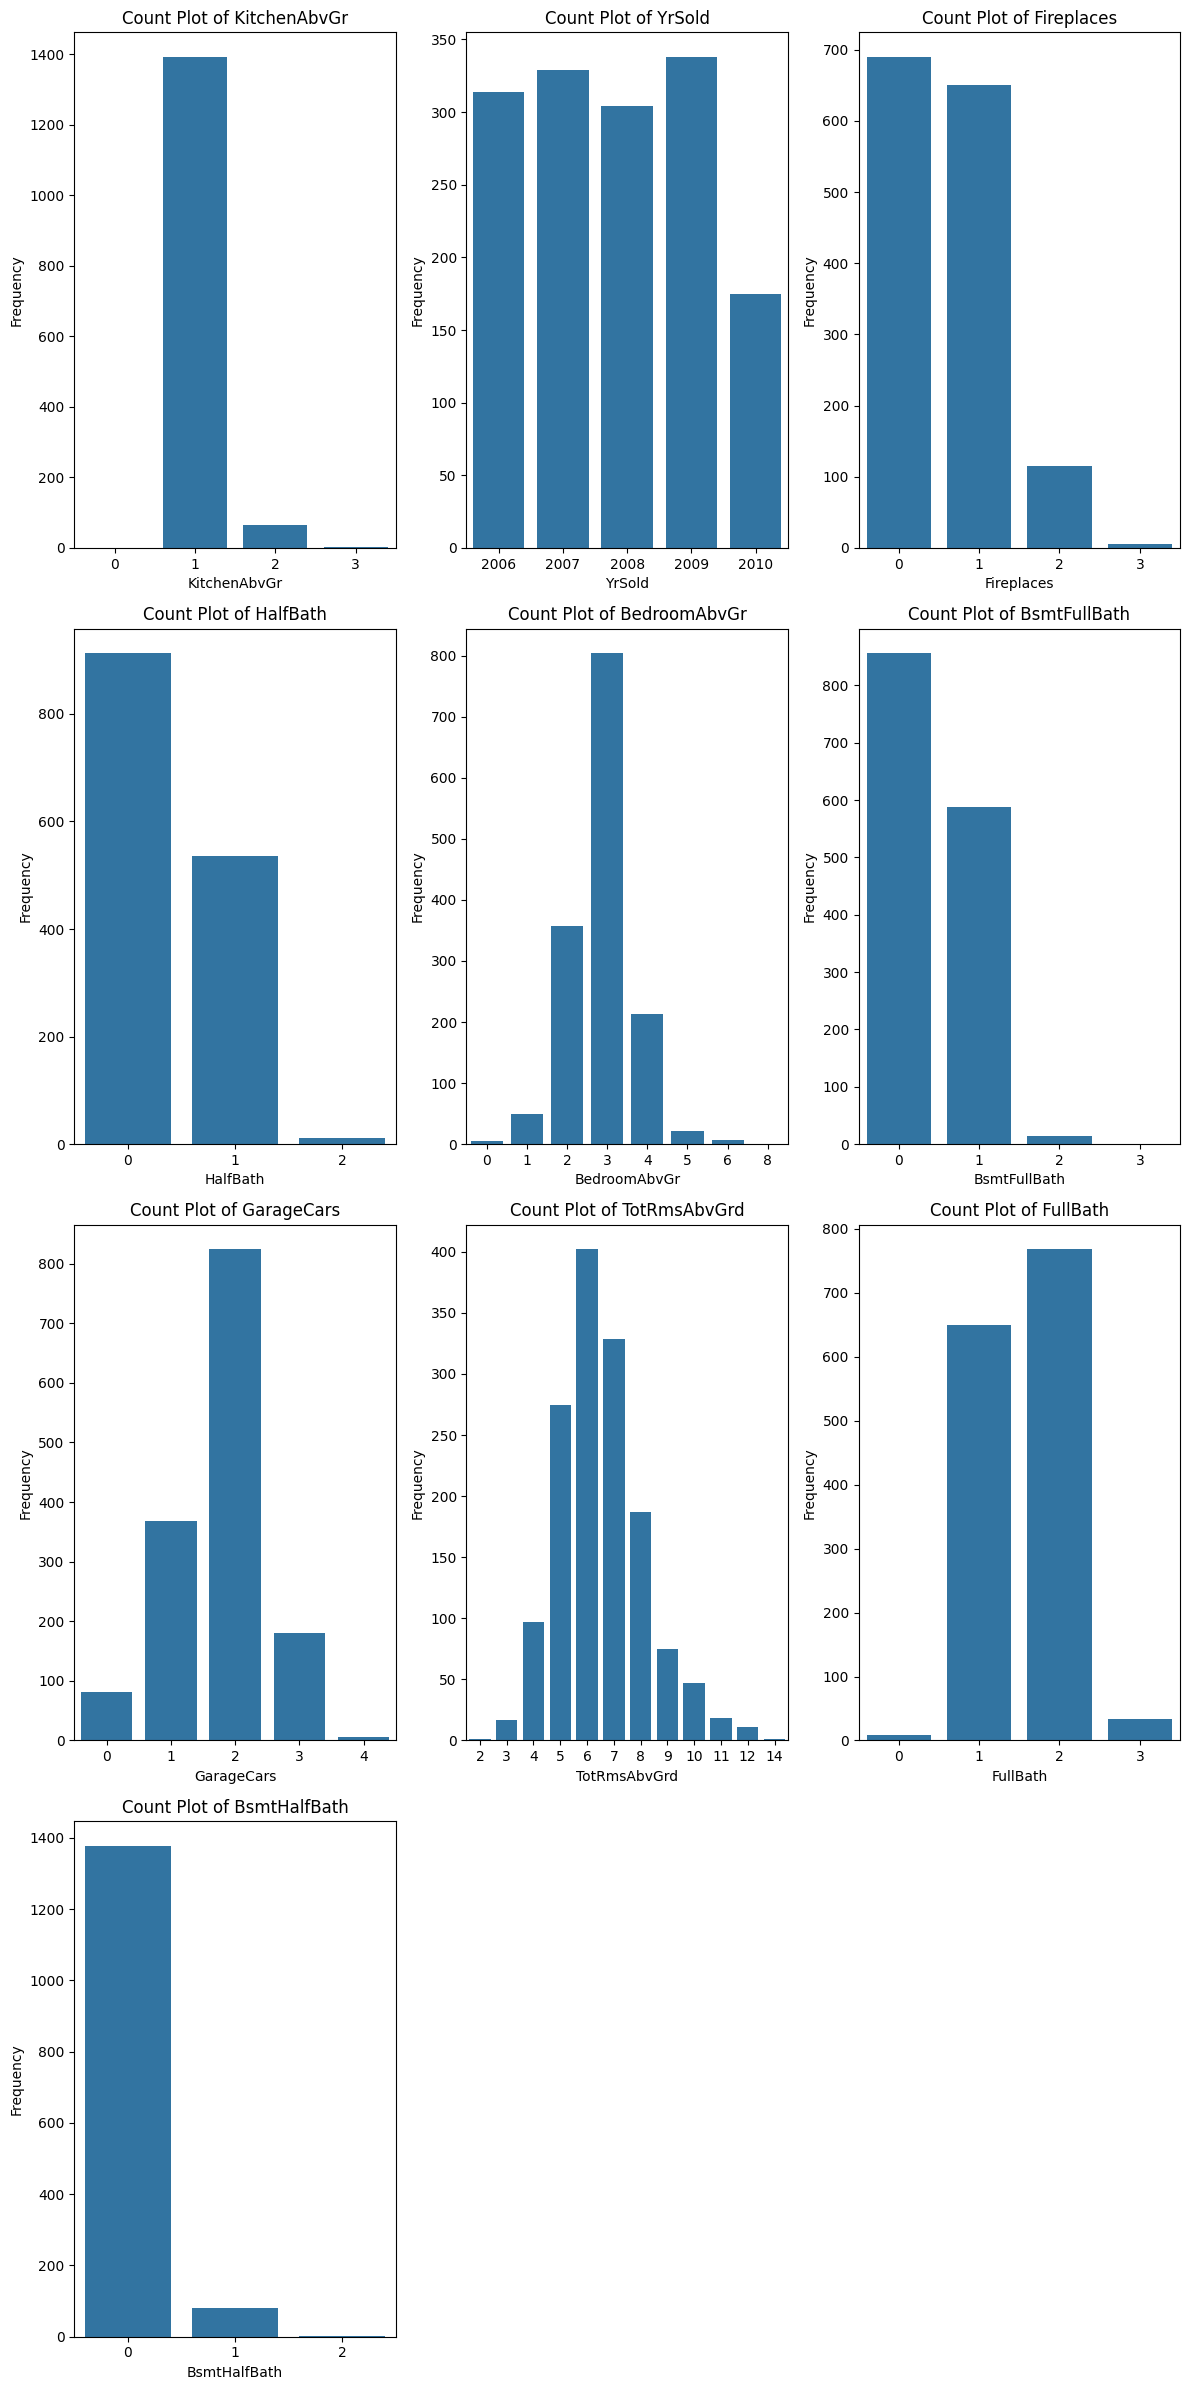

In [30]:
#countplot the discrete numerical data
display_plot(train_df, dnum_names, 'C', ['YearBuilt', 'YearRemodAdd'])

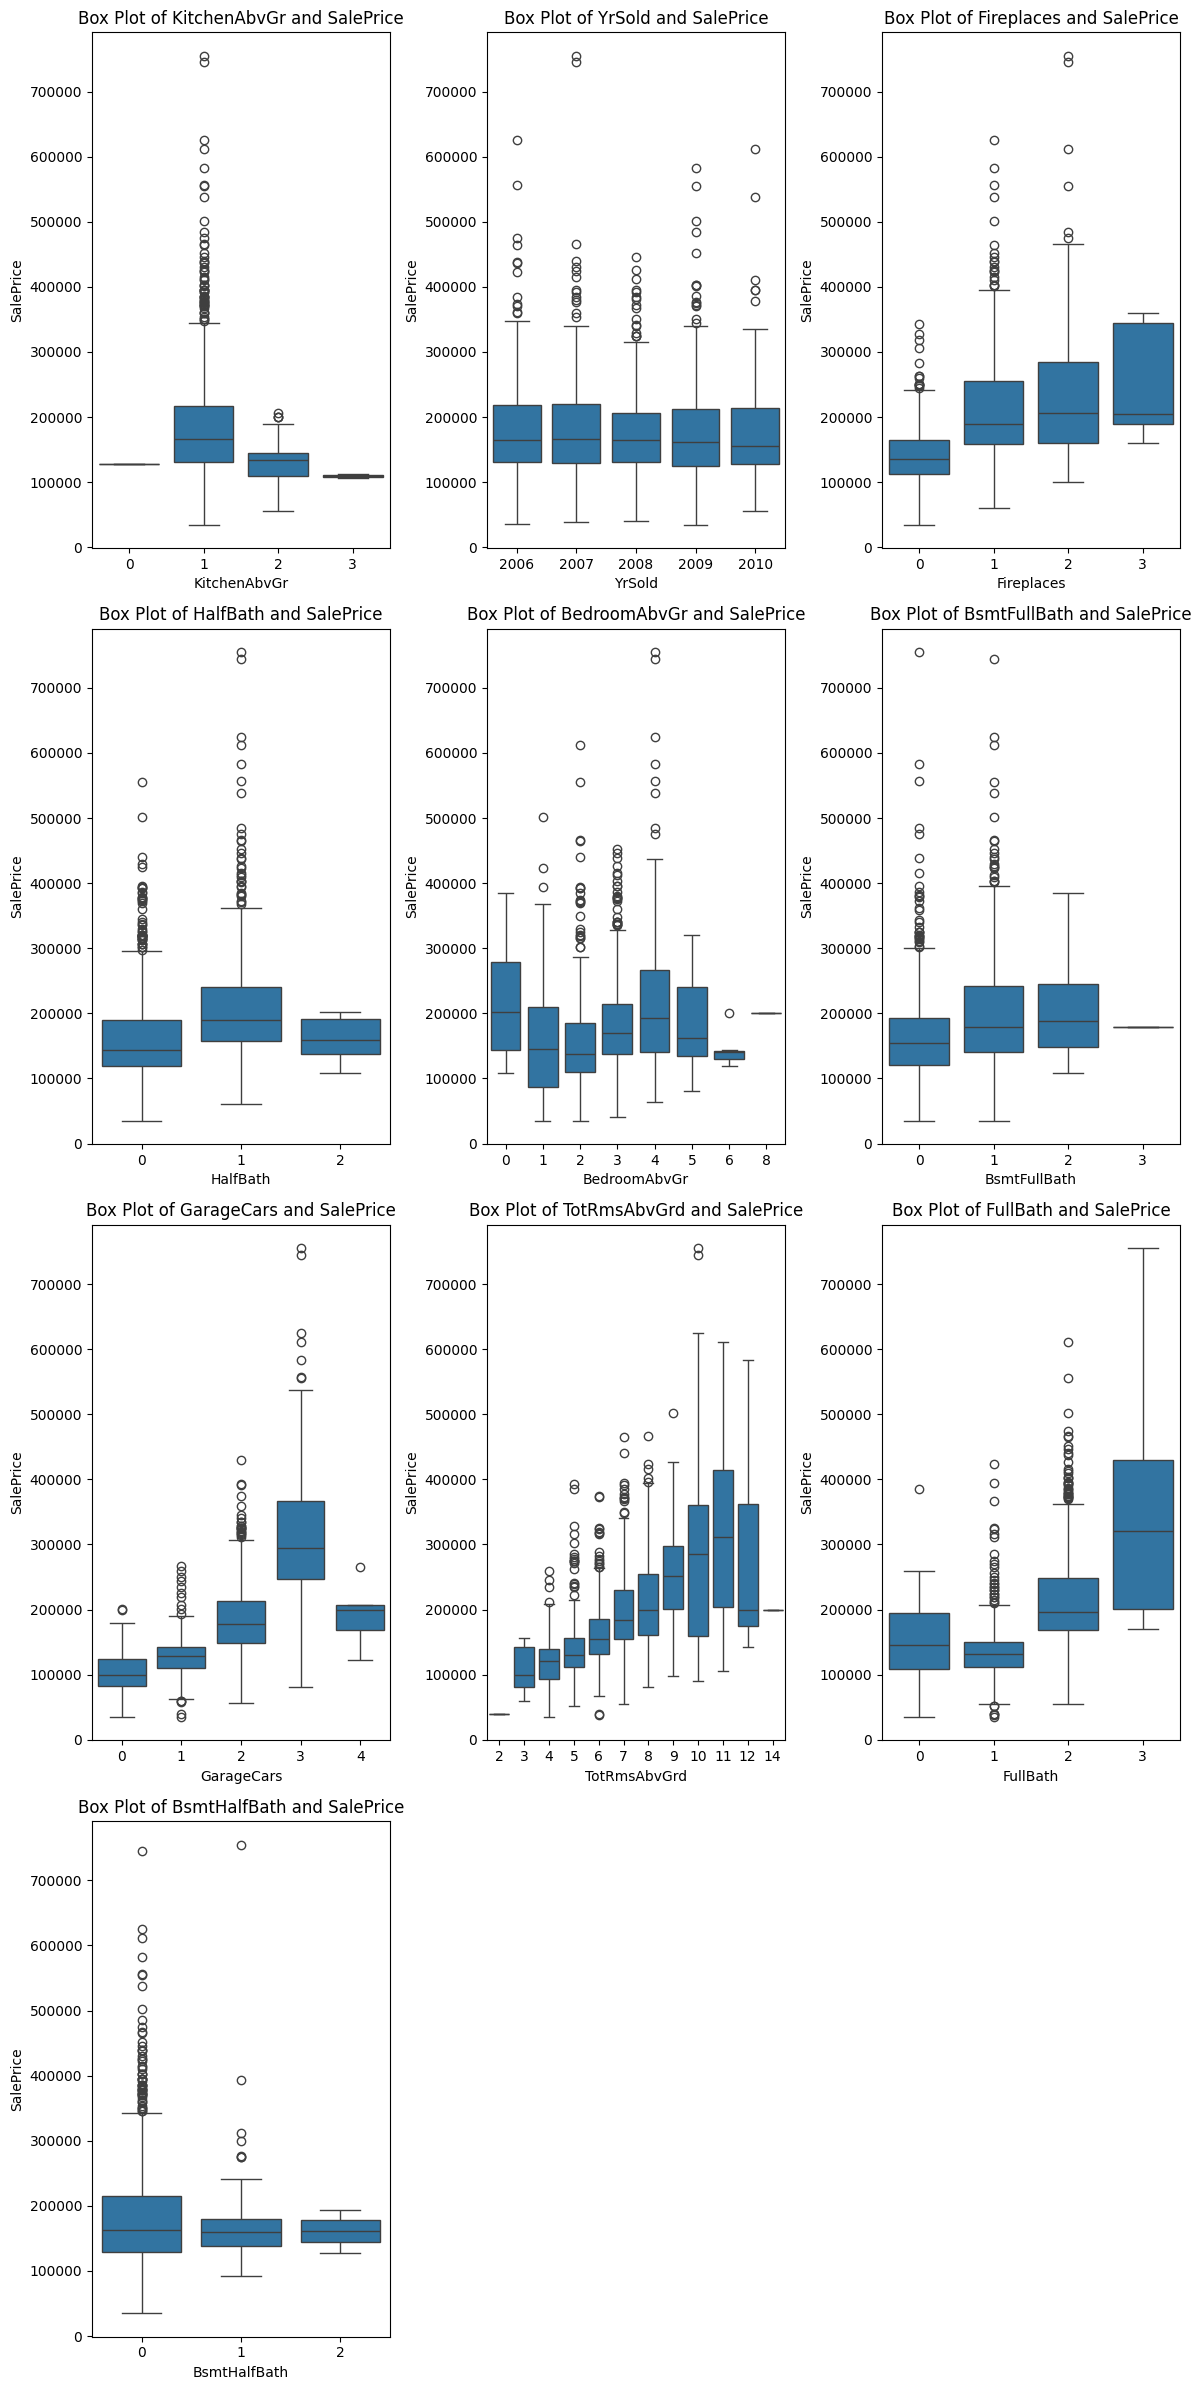

In [31]:
# boxplot the discrete numerical data
display_plot(train_df, dnum_names, 'B', ['YearBuilt', 'YearRemodAdd'])

##### Note:

__BsmtFullBatch__, __BsmtHalfBath__ are skewed towards left. It is expected that the basement rarely has a bathroom or there are no basement, furthermore, the range of the variable seems to have a nearly equal impact on the SalePrice. 

__KitchenAbvGr__ has a very uneven distrubition and the median between the categories are close and furthermore a lot of outliers for the dominating category.
Moreover, from a domain knowledge perspective there is not many properties with multiple kitchens or no kitchens. This column will not add value to the model and should be dropped

__YrSold__ this variable have an equal impact on the Saleprice across the range of values it takes.

In [32]:
#Drop the bad variables
train_df.drop(['BsmtFullBath', 'BsmtHalfBath', 'KitchenAbvGr', 'YrSold'], axis=1, inplace=True)
dnum_names = change_list(dnum_names, ['BsmtFullBath', 'BsmtHalfBath', 'KitchenAbvGr', 'YrSold'], 0)

#### DataVisualization for Continous Numerical Data

We look at the distrubition of the continous numerical data

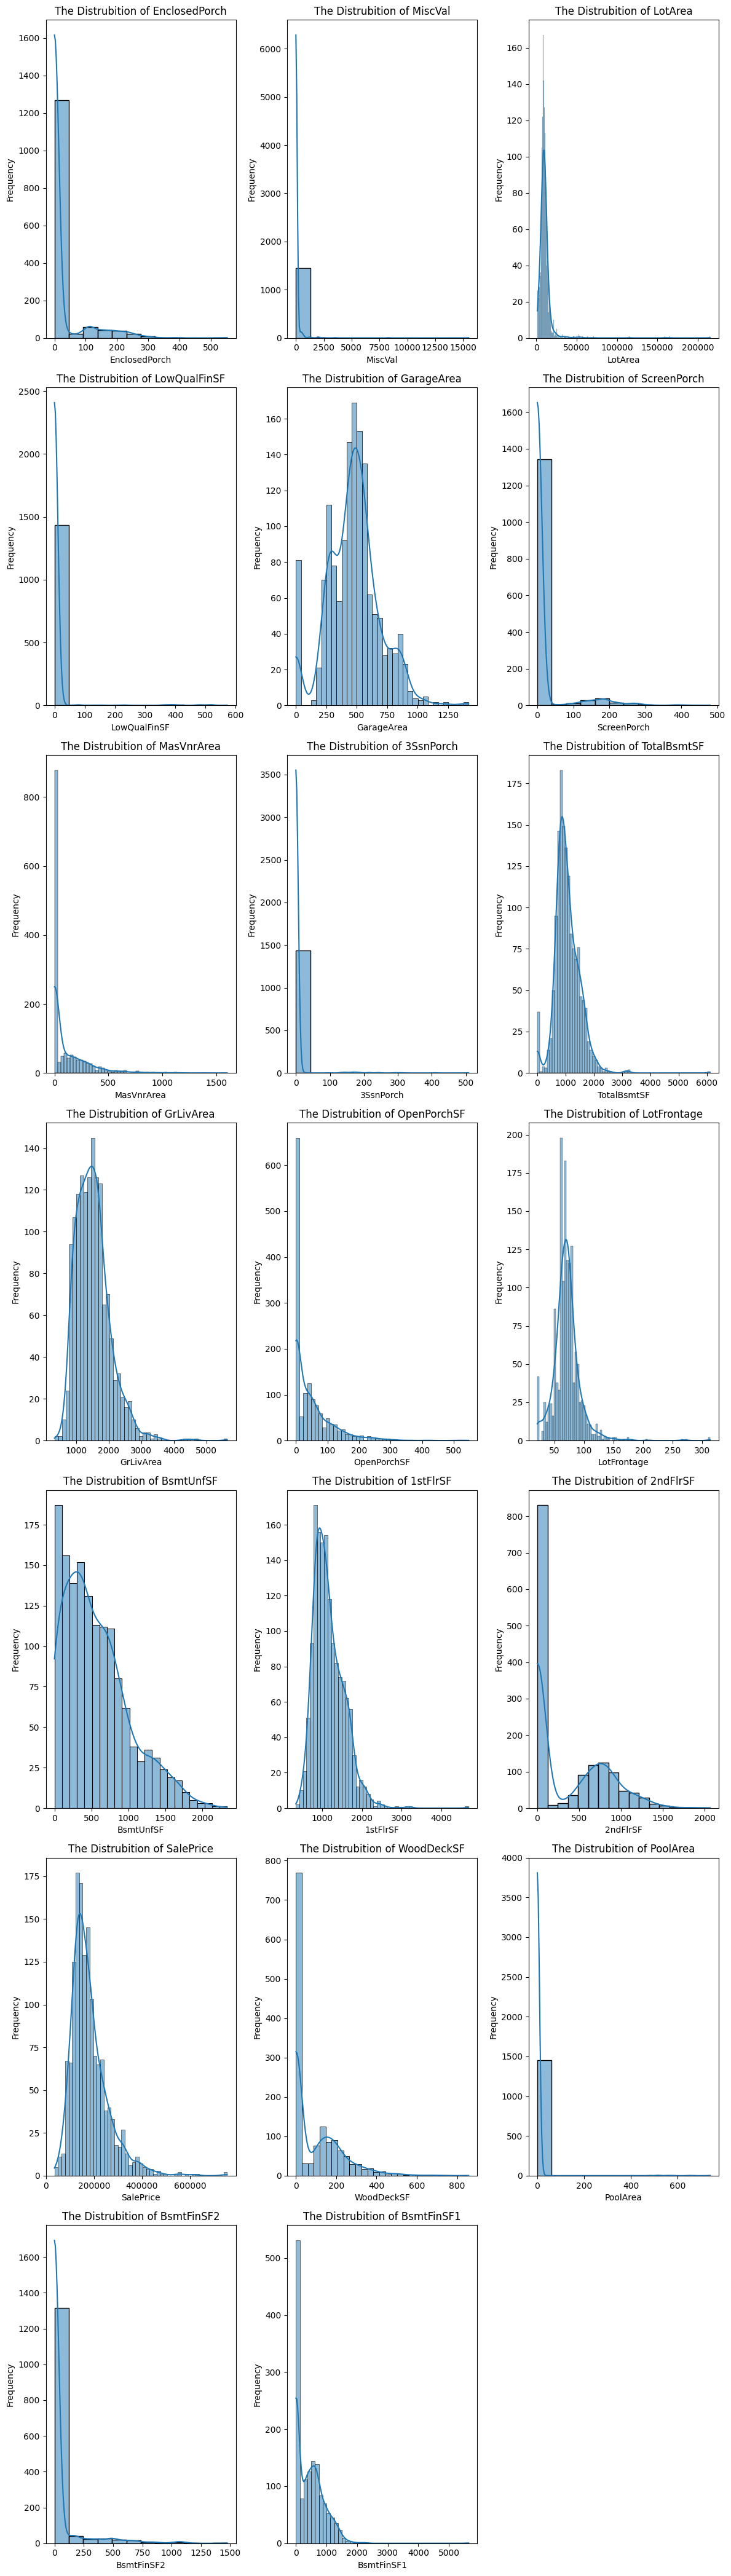

In [33]:
#plot the distrubition of the continous variables
display_plot(train_df, cnum_names, 'H')

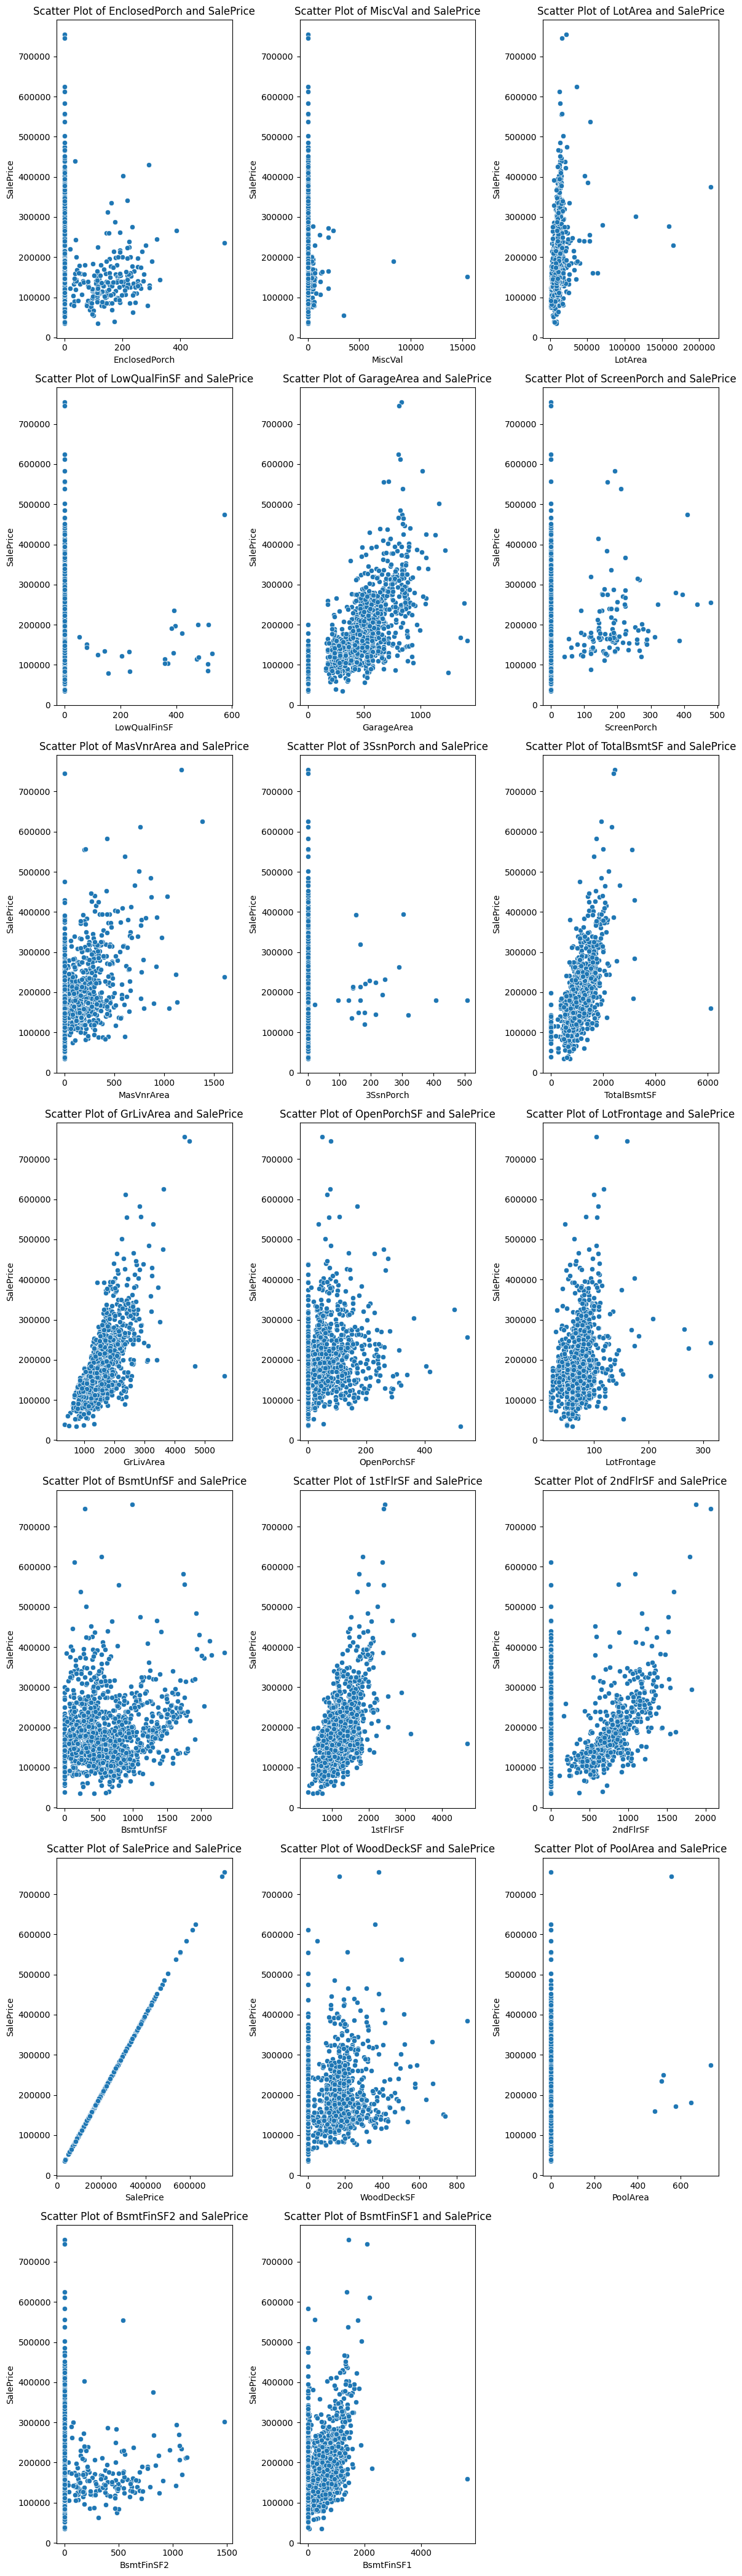

In [34]:
#plot the scatter plot for the continous variables
display_plot(train_df, cnum_names, 'S')

##### Note:

__Miscval__, __BsmtFinSF2__, __ScreenPorch__, __MasVnrArea__, __EnclosedPorch__, __LowQualFinSF__, __PoolArea__, __3SsnPorch__: These variables distributions are so vastly skewed towards the left that no processing can adjust for them. Furthemore, the scatterplots reveals that many of these variables seem not to be linearly correlating with the target variable.

In [35]:
#drop the bad variables
train_df.drop(['MiscVal', 'BsmtFinSF2', 'ScreenPorch', 'MasVnrArea', 'EnclosedPorch', 'LowQualFinSF', 'PoolArea', '3SsnPorch'], axis=1, inplace=True)
cnum_names = change_list(cnum_names, ['MiscVal', 'BsmtFinSF2', 'ScreenPorch', 'MasVnrArea', 'EnclosedPorch', 'LowQualFinSF', 'PoolArea', '3SsnPorch'], 0)

#### Handle Outliers in the Continous Numerical Data

In [36]:
 def remove_outliers(df, IQR_factor=1.5, df_columns=None):
        ''' removes outliers in numerical dataframe
        Args:
        df: dataframe being operated on
        IQR_factor: factor that drives where the outlier limit
        df_columns: provided column names to remove outliers on
        Returns:
        df_no_outlier: dataframe where outliers has been removed
        outlier_indices_dict: a dict which contains indices that should 
        be removed in corresponidng categorical dataframe
        '''
        # index mask representing the rows
        outlier_mask = pd.Series(False,  index=df.index)

        #if no column names has provide process all columns
        if type(df_columns)==type(None):
            df_columns = df.columns
            
        for feature in df_columns:
            Q1, Q3 = df[feature].quantile(0.25), df[feature].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound, upper_bound = Q1 - IQR_factor * IQR, Q3 + IQR_factor * IQR
            outlier_bool = (df[feature] < lower_bound) | (df[feature] > upper_bound)
            outlier_mask |= outlier_bool


        df_no_outliers = df[~outlier_mask]

        return df_no_outliers, outlier_mask

In [37]:
#plot the outliers and remove the outliers
old_train_df = train_df.copy()
train_df, outlier_mask = remove_outliers(train_df, df_columns = [c for c in cnum_names if c!='SalePrice']) 

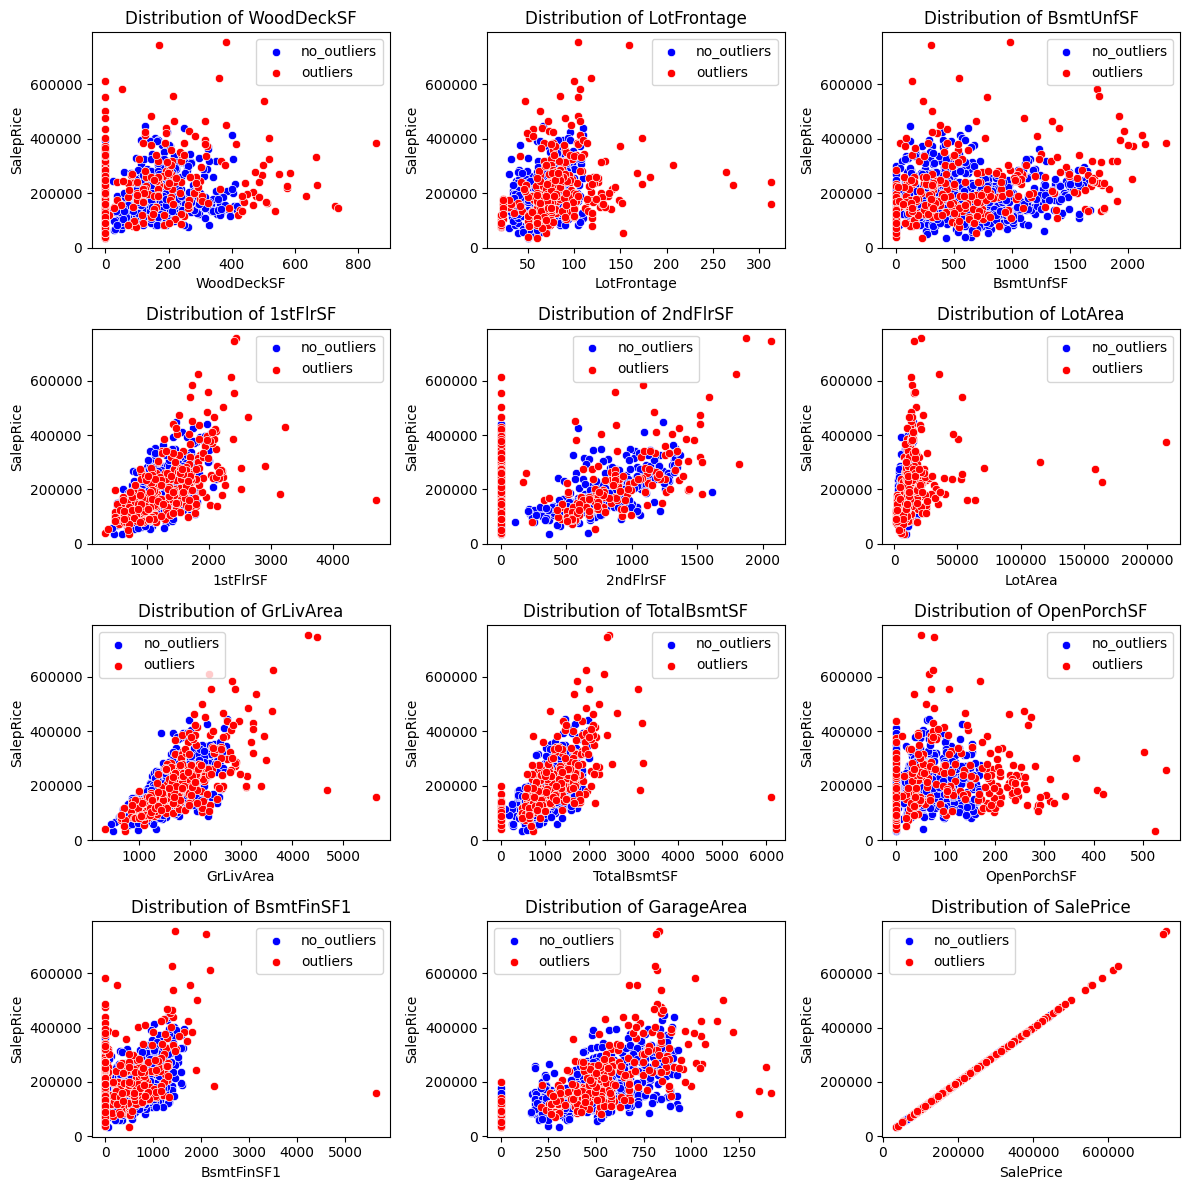

In [38]:
num_plots = len(cnum_names)
num_cols = 3
num_rows = (num_plots + num_cols -1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 3*num_rows))
axes = axes.flatten()
                        
for i, name in enumerate(cnum_names):
    sns.scatterplot(x=train_df[name], y=train_df['SalePrice'], ax=axes[i], color='blue', label='no_outliers')
    sns.scatterplot(x=old_train_df[outlier_mask][name], y=old_train_df[outlier_mask]['SalePrice'], ax=axes[i], color='red', label='outliers')
    axes[i].set_xlabel(name)
    axes[i].set_ylabel('SalepRice')
    axes[i].set_title("Distribution of {}".format(name))

for i in range(num_rows*num_cols, num_plots, -1):
    axes[i-1].set_visible(False)

plt.tight_layout()
plt.show()

##### Note:
The outliers shown here a row specific, so in some columns they are ordinary values but in other columns they are outliers(red dots) 

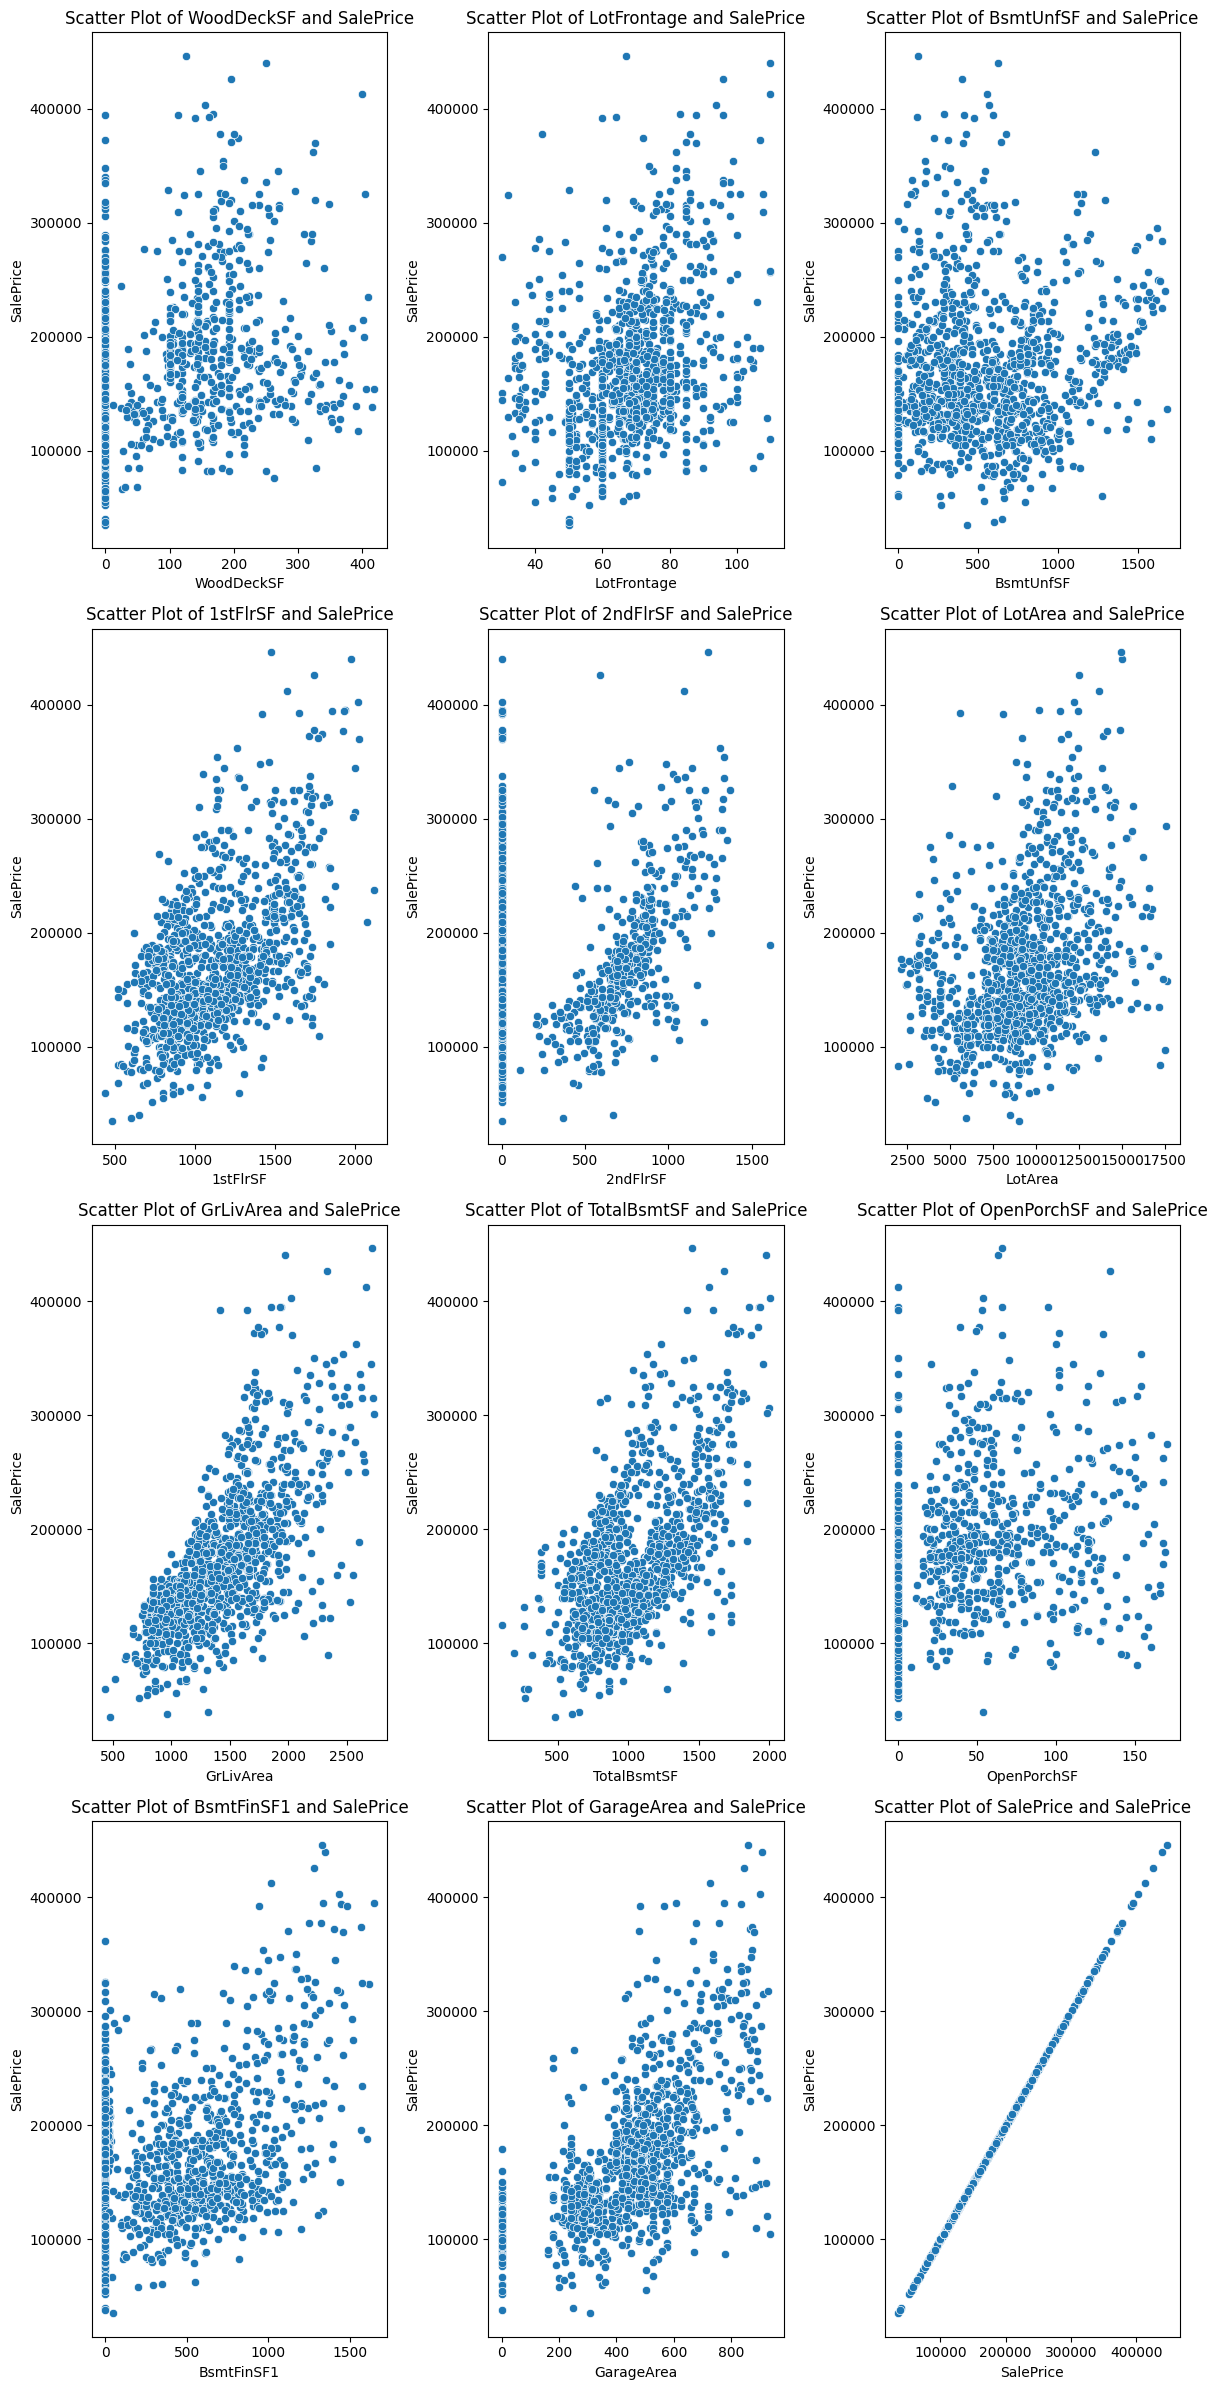

In [39]:
# Lets plot the cleaned scatter plot
display_plot(train_df, cnum_names, 'S')

##### Note:
On further analysis, we can see that there more variables that badly correlates with the target variable 
but they also have a vary scattered distrubition or skewness towards the left. Such variables are:
__OpenPorchSF__, __LotArea__, __2ndFlrSF__, __BsmtFinSF1__, __BsmtUnfSF__, __LotFrontage__, __WoodDeckSF__.

#### HeatMap of the Continous Numerical Data

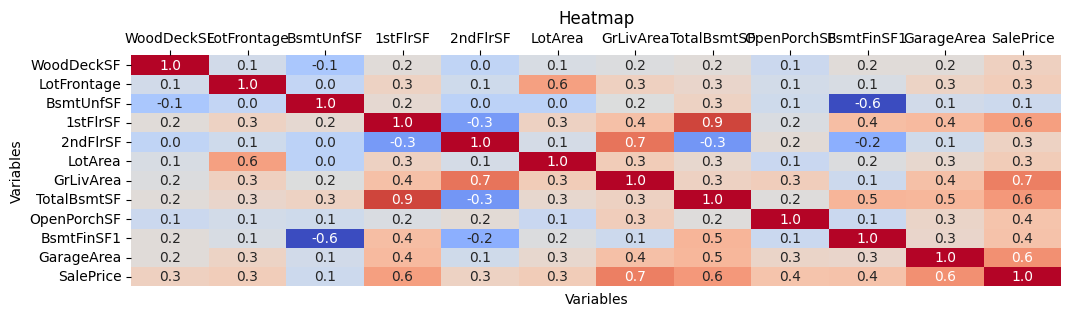

In [40]:

#Reorder
cnum_names.remove('SalePrice')
cnum_names.append('SalePrice')

#Lets have a look at how the different variables correlate with target_variable
fig, axes = plt.subplots(1,1, figsize=(12,3))
sns.heatmap(train_df[cnum_names].corr(), cmap='coolwarm', annot=True, fmt='.1f', cbar=False, ax=axes)
axes.set_title('Heatmap')
axes.xaxis.tick_top()
axes.set_xlabel('Variables')
axes.set_ylabel('Variables')

plt.show()


##### Note:
We can observe a collinearity between __TotalBsmtSF__ and __1stFlrSF__, this could lead to overfitting and does not provide more information to the model. Since __TotalBsmtSF__ is more correlating with SalePrice then __1stFlrSF 0.6 > 0.5, it is best to drop __1stFlrSF__. 

In [41]:
#Droping the bad variables
train_df.drop(['OpenPorchSF', 'LotArea',  '1stFlrSF','2ndFlrSF', 'BsmtFinSF1', 'BsmtUnfSF', 'LotFrontage', 'WoodDeckSF'], axis=1, inplace=True)
cnum_names = change_list(cnum_names, ['OpenPorchSF', 'LotArea',  '1stFlrSF','2ndFlrSF', 'BsmtFinSF1', 'BsmtUnfSF', 'LotFrontage', 'WoodDeckSF'], 0)

### Categorical Data Exploration

#### Discrete Numerical Data threated as Nominal Categorical Data
The discrete numerical data that is left after cleaning the data can all be treated as categorical data. 
This is applicable to variables that have small unique values and do not possess any ordinal relationship.

In [42]:
print("\033[1mDiscrete numerical names\033[0m\n{}".format("\n".join(dnum_names)))

Discrete numerical names
YearRemodAdd
Fireplaces
YearBuilt
HalfBath
BedroomAbvGr
GarageCars
TotRmsAbvGrd
FullBath


To make the__YearBuilt__ and __YearRemodAdd__ more robust for any possible value we perform some transformations. Binning the values at specific values might


In [43]:
# The assigned labels and bin egdes
bin_labels = ["before 1900", "1900-2000", "after 2000"]
bin_egdes = [float('-inf'), 1900, 2000, float('inf')]

#bin the column
train_df['BinYearBuilt'] = pd.cut(train_df['YearBuilt'], bins=bin_egdes,  labels=bin_labels)
train_df['BinYearRemodAdd'] = pd.cut(train_df['YearRemodAdd'], bins=bin_egdes, labels=bin_labels)


#add to discrete numerical data
dnum_names = list(set(dnum_names) | set(['BinYearBuilt', 'BinYearRemodAdd']))

dnum_names.remove('YearBuilt')
dnum_names.remove('YearRemodAdd')

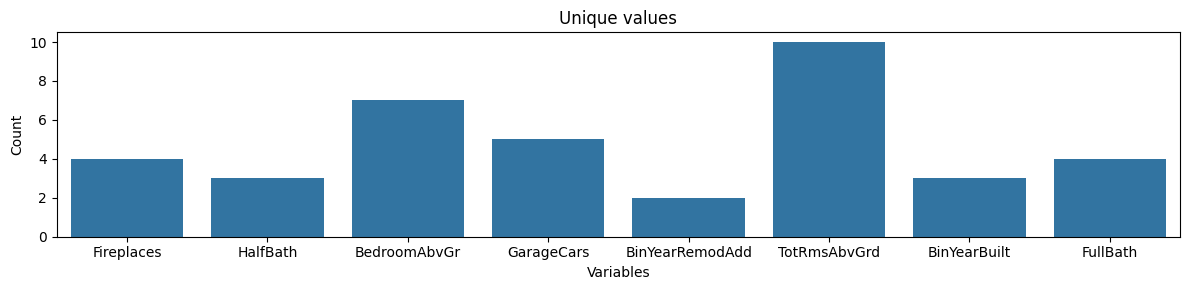

In [44]:
fig, axes = plt.subplots(1,1, figsize=(12,3))

data = pd.DataFrame([(name, train_df[name].nunique()) for name in dnum_names], columns=['Variables', 'Count'])

sns.barplot(data=data, x='Variables', y='Count', ax=axes)
axes.set_title("Unique values")
axes.set_ylabel("Count")
axes.set_xlabel("Variables")

plt.tight_layout()
plt.show()

In [45]:
#add the discrete numerical column names to nominal_names
nominal_names = list(set(nominal_names) | set(dnum_names))
dnum_names = change_list(dnum_names, dnum_names, 0)

In [46]:
#Convert the discrete numerical data into categorical 
train_df[dnum_names] = train_df[dnum_names].astype('category')

#Make sure that all categorical columns are astype 'category' to avoid problems later
train_df[nominal_names] = train_df[nominal_names].astype('category')

#### Handle Nans in Categorical Nominal Data
Assigning them a new category like "missing" is appropriate

In [47]:
#identiity all columns with nans
nan_cols = train_df[nominal_names].columns[train_df[nominal_names].isnull().any()]
print("\033[1mMissing Cols\033[0m\n{}".format("\n".join(nan_cols)))

#add a new category 'missing'
train_df[nan_cols] = train_df[nan_cols].apply(lambda x: x.cat.add_categories('Missing'))

#impute the values
train_df[nan_cols] = train_df[nan_cols].fillna('Missing')

Missing Cols
GarageType
MasVnrType
Electrical
MiscFeature
Alley


#### Datavisualization of the nominal categorical data

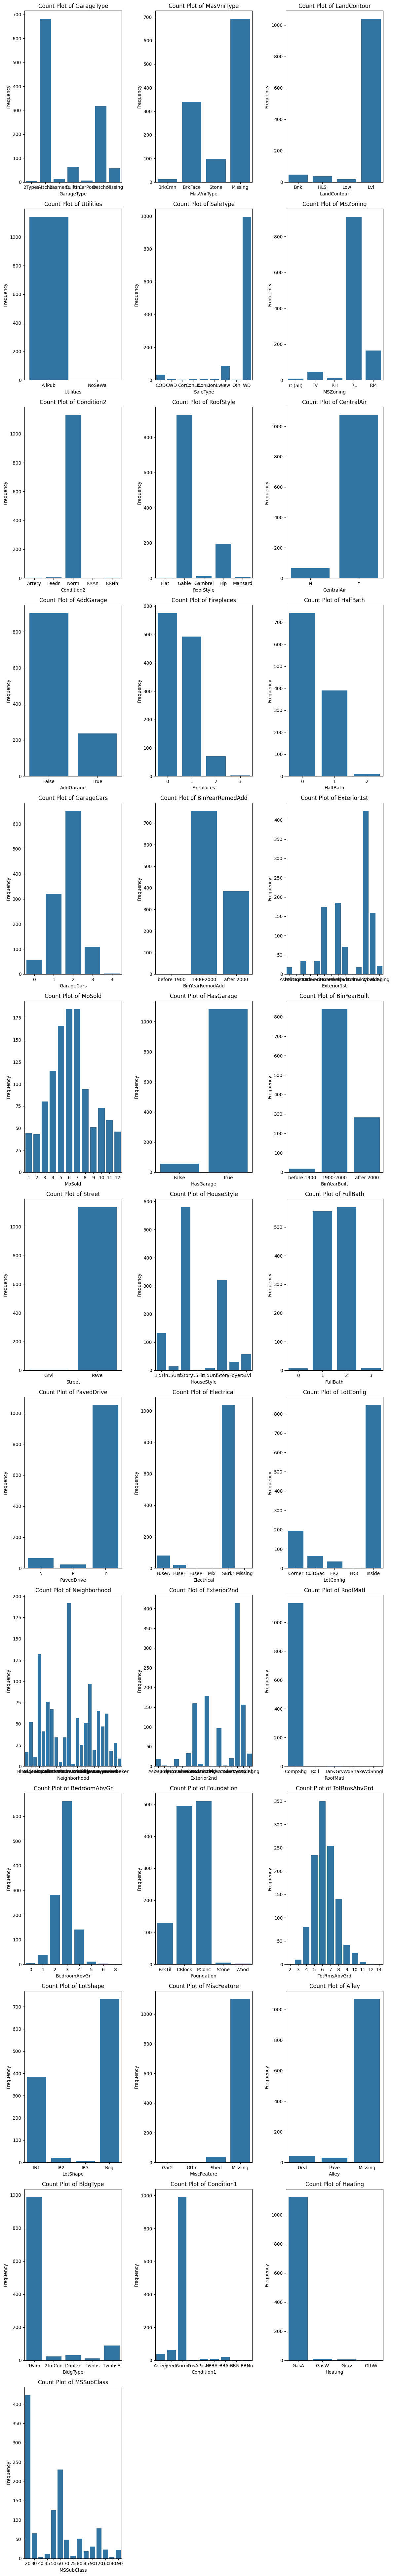

In [48]:
# Lets plot the distribution of the nominal variables
display_plot(train_df, nominal_names, 'C')

Lets investigate how the target price is impacted by each category level

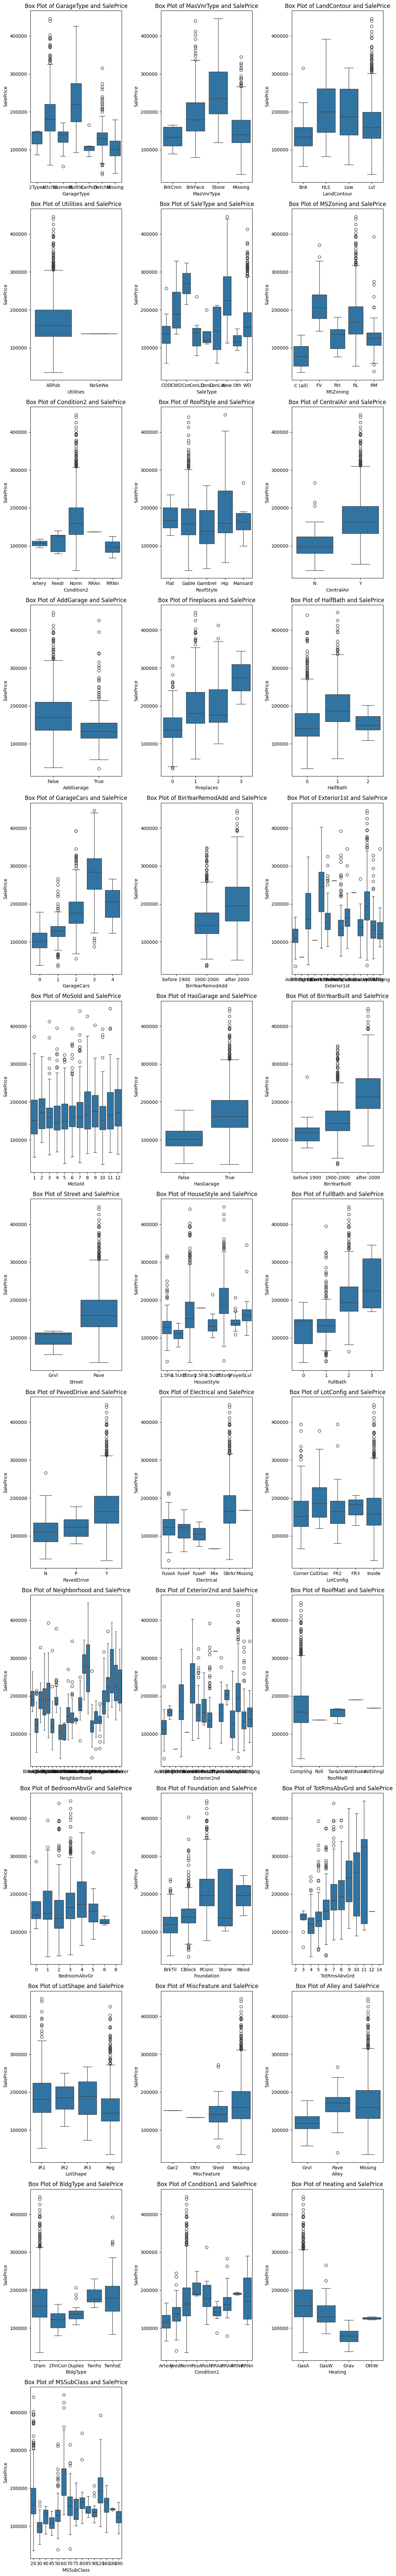

In [49]:
#plot the boxplot for the nominal variables
display_plot(train_df, nominal_names, 'B')                                         

#### DataVisualization of the Ordinal Variable

In [50]:
#### Handling Nans in Ordinal Variable

In [51]:
#this is a more direct way to compute the number of Nans
print_nan_columns(train_df, ordinal_names)

GarageQual        57
BsmtExposure       1
GarageCond        57
PoolQC          1139
Fence            902
GarageFinish      57
FireplaceQu      576
dtype: int64


All of the missing values a logical and refers to that either there is no pool, fence, garage, fireplase or basement

In [52]:
#all the columns with nans
nan_ord = ['GarageQual', 'BsmtExposure', 'GarageCond', 'PoolQC', 'Fence', 'GarageFinish', 'FireplaceQu']

#replace all the Nans with 'missing",
train_df[nan_ord] = train_df[nan_ord].fillna('Missing') 


In [53]:
#check for any Nans
print_nan_columns(train_df, ordinal_names)

Series([], dtype: int64)


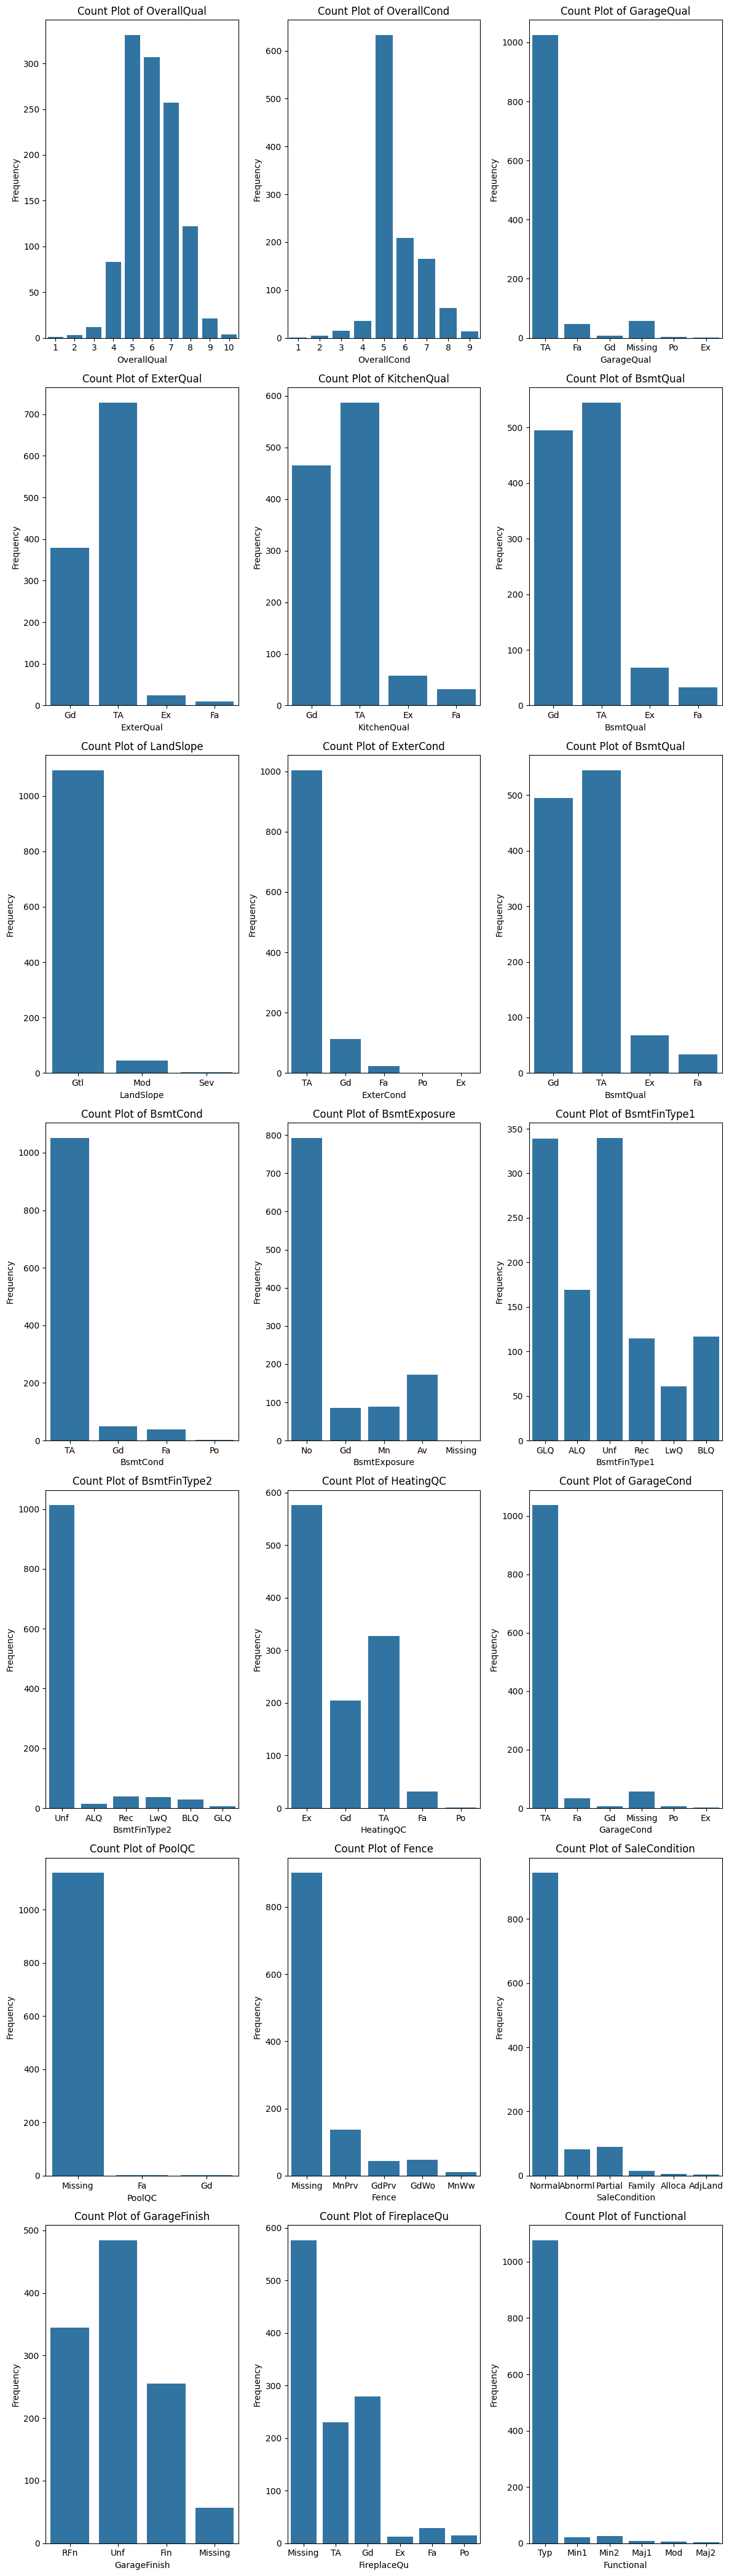

In [54]:
# plot countplots for the ordinal variables
display_plot(train_df, ordinal_names, 'C')

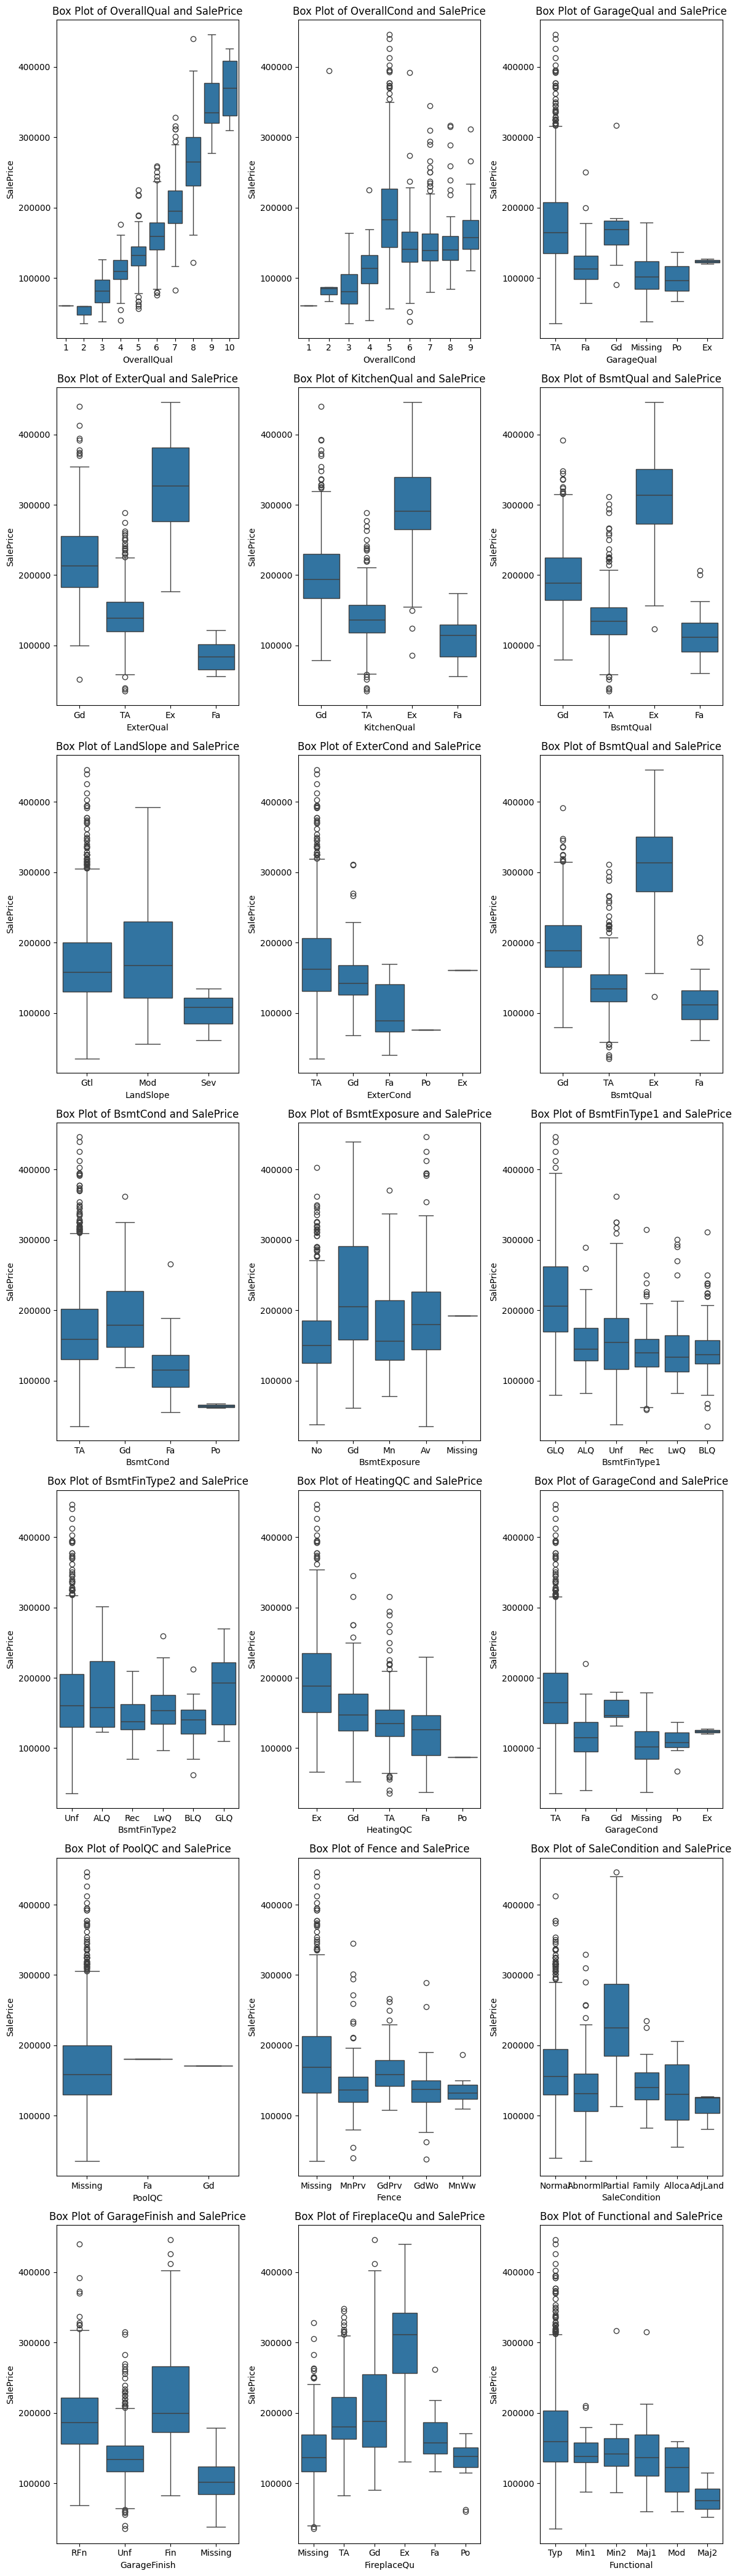

In [55]:
 #plot boxplots for the ordinal variables
display_plot(train_df, ordinal_names, 'B')                                        

#### Hypothesis testing
I want to perform a  hypothesis test to see if the category levels of the variables differ or not.
Meaning does the categorical provide any meaningful information on the target variable.
While not being equally powerful as ANOVA the Kruskal-Wallis H-test releases us from the 
need to check for normality or homoscedasticity.

In [56]:
def kruskal_tests(c_df, col_name,  a_level=0.05):
    ''' performs kruskal test on the categorical variables at a given significance level 
    Arguments:
    c_ddf: is the dataframe of containing the given categorical variable and 'SalePrice'
    col_name: the name of the categorical variabel
    a_level: is the significance level of the test
    Return:
    results:
        (tuple):
            col_name: the name of categorical variable
            p-value: the p-value of the test
            statistics_results: the results of the anova test 
            significance: boolean assessment of the signifiance 
    '''


    # unique category_levels
    category_levels = list(c_df[col_name].unique())
    
    # SalePrice data for the specific category level
    sale_price_data = [c_df[c_df[col_name] == category]['SalePrice'] for category in category_levels]
    
    #perform anova
    statistics_results, p_value = kruskal(*sale_price_data)

    #update the dict with the results of the given category level
    
    results = (col_name, p_value, statistics_results, True if p_value <= a_level else False)

    return results
    

In [57]:
results = list(map(lambda name: kruskal_tests(train_df[[name, 'SalePrice']], name), nominal_names))

In [58]:
#Create a dataframe
sig_results = pd.DataFrame(results, columns=['Variable Name', 'P-Value', 'F-stat', 'Significance'])
sig_results.sort_values('P-Value', ascending=True)

Variable Name        P-Value      F-stat  Significance
24     Neighborhood  1.300840e-131  689.456268          True
12       GarageCars  1.560168e-112  526.041530          True
20         FullBath  8.099523e-107  494.325244          True
0        GarageType   3.682851e-89  427.342957          True
36       MSSubClass   5.300501e-89  458.640256          True
28       Foundation   1.660628e-88  414.920079          True
17     BinYearBuilt   3.118256e-69  315.482195          True
29     TotRmsAbvGrd   4.944791e-59  298.691860          True
14      Exterior1st   4.561356e-58  308.226252          True
1        MasVnrType   2.604864e-55  256.472792          True
25      Exterior2nd   1.942407e-53  292.580379          True
10       Fireplaces   1.463044e-52  243.760570          True
13  BinYearRemodAdd   6.101999e-44  193.284293          True
5          MSZoning   2.251092e-43  205.685240          True
19       HouseStyle   1.163574e-40  204.692648          True
11         HalfBath   5.115137e-38  171.732059          True
8        CentralAir   3.952283e-24  102.673336          True
21       PavedDrive   2.569749e-23  104.031297          True
16        HasGarage   1.536528e-22   95.424340          True
9         AddGarage   4.370238e-22   93.355236          True
4          SaleType   1.012672e-21  117.650112          True
22       Electrical   2.455587e-20  101.579151          True
30         LotShape   6.943584e-19   87.666996          True
34       Condition1   1.282073e-13   77.917651          True
27     BedroomAbvGr   8.728978e-12   63.499922          True
32            Alley   2.800459e-10   43.992135          True
33         BldgType   9.024599e-09   43.286340          True
2       LandContour   3.065886e-06   28.350555          True
35          Heating   1.715260e-04   19.978095          True
23        LotConfig   1.184515e-03   18.091104          True
6        Condition2   6.557610e-03   14.243328          True
18           Street   1.456519e-02    5.968315          True
31      MiscFeature   5.774968e-02    7.492569         False
7         RoofStyle   1.458000e-01    6.818433         False
15           MoSold   2.247849e-01   14.150360         False
3         Utilities   5.437106e-01    0.368706         False
26         RoofMatl   8.979919e-01    1.076441         False

In [59]:
#show only the variable with the False significance
sig_results[sig_results['Significance']==False]

Variable Name   P-Value     F-stat  Significance
3      Utilities  0.543711   0.368706         False
7      RoofStyle  0.145800   6.818433         False
15        MoSold  0.224785  14.150360         False
26      RoofMatl  0.897992   1.076441         False
31   MiscFeature  0.057750   7.492569         False

###### Note:
These results suggests that almost all variable were signficantly different.
Moreover, we can obsevere that some variables has a more closer impact on the target variable. 
The top variables does from a domain knowledge and logical perspective have to do more with
the buyers interests. As we can observe more of the technical aspects are in the bottom
which might not be the most relevant information to the buyer.

In [60]:
#remove the less impactful variables
drop_nominal_names = ['RoofMatl', 'MoSold', 'RoofStyle', 'Utilities', 'MiscFeature',
                      'Street', 'Condition2', 'LotConfig', 'Heating', 'LandContour',
                        'BldgType', 'Alley', 'Condition1', 'BedroomAbvGr', 'SaleType',
                      'LotShape', 'Electrical', 'AddGarage', 'HasGarage', 
                      'PavedDrive', 'CentralAir', 'HalfBath', 'HouseStyle', 'MSZoning',
                     'BinYearRemodAdd', 'Fireplaces', 'Exterior2nd', 'MasVnrType',
                     'Exterior1st']
train_df.drop(drop_nominal_names, axis=1, inplace=True)
                      

In [61]:
nominal_names = change_list(nominal_names, drop_nominal_names, 0)

##### Lets repeat this for ordinal names

In [62]:
results = list(map(lambda name: kruskal_tests(train_df[[name, 'SalePrice']], name), ordinal_names))

In [63]:
#Create a dataframe
sig_results = pd.DataFrame(results, columns=['Variable Name', 'P-Value', 'F-stat', 'Significance'])
sig_results.sort_values('P-Value', ascending=True)

Variable Name        P-Value      F-stat  Significance
0     OverallQual  7.623993e-156  750.952522          True
3       ExterQual  8.689995e-116  535.711132          True
5        BsmtQual  3.902930e-114  528.087402          True
8        BsmtQual  3.902930e-114  528.087402          True
4     KitchenQual  2.814821e-110  510.286220          True
18   GarageFinish  3.570623e-109  505.195380          True
13      HeatingQC   1.808224e-61  289.695820          True
19    FireplaceQu   1.912589e-57  275.425676          True
11   BsmtFinType1   2.870837e-57  274.604491          True
1     OverallCond   2.567930e-44  225.563939          True
2      GarageQual   3.000897e-33  162.431580          True
14     GarageCond   2.205349e-30  148.976020          True
17  SaleCondition   4.676943e-25  123.901854          True
10   BsmtExposure   2.640205e-18   88.577467          True
16          Fence   1.127761e-15   76.168525          True
9        BsmtCond   2.104492e-10   48.024090          True
7       ExterCond   3.962180e-09   45.007253          True
20     Functional   7.596617e-05   26.360251          True
12   BsmtFinType2   2.270045e-03   18.611505          True
6       LandSlope   7.498874e-02    5.180835         False
15         PoolQC   8.367447e-01    0.356473         False

In [64]:
#show only the variable with the False significance
sig_results[sig_results['Significance']==False]

Variable Name   P-Value    F-stat  Significance
6      LandSlope  0.074989  5.180835         False
15        PoolQC  0.836745  0.356473         False

In [65]:
drop_ord_names = ['PoolQC', 'LandSlope', 'BsmtFinType2', 'Functional',
                 'ExterCond', 'BsmtCond', 'BsmtExposure', 'Fence',
                 'SaleCondition', 'GarageCond', 'GarageQual', 'BsmtFinType1',
                 'FireplaceQu', 'HeatingQC']
train_df.drop(drop_ord_names, axis=1, inplace=True)

In [66]:
ordinal_names = change_list(ordinal_names, drop_ord_names, 0)

In [67]:
#view all the remaining columns
# print("\033[1mOrdinal_names\033[0m\n{}".format("\n".join(ordinal_names)))
# print("\033[1mNominal_names\033[0m\n{}".format("\n".join(nominal_names)))
# print("\033[1m Discrete Numerical_names\033[0m\n{}".format("\n".join(dnum_names)))
# print("\033[1m Continous Numerical_names\033[0m\n{}".format("\n".join(cnum_names)))
# print("Total number of columns left {}".format(len(train_df.columns)))

In [68]:
# get the definition of the wanted columns for the preprocessing
# remember to change BinYearBuilt and BinYearRemoeAdd to their original YearBuilt and YearRemodAdd
for col, name in zip([ordinal_names, nominal_names, dnum_names, cnum_names], ["ordinal_names", "nominal_names", "dnum_names", "cnum_names"]):
    joint_columns = "','".join(col)
    wanted_columns_strings = name + " = ['{}']".format(joint_columns)
    wanted_columns_strings = wanted_columns_strings.replace('BinYearBuilt', 'YearBuilt')
    #wanted_columns_strings = wanted_columns_strings.replace('BinYearRemodAdd', 'YearRemodAdd')
    print(wanted_columns_strings)

ordinal_names = ['BsmtQual','OverallQual','OverallCond','KitchenQual','ExterQual','GarageFinish']
nominal_names = ['GarageType','Neighborhood','GarageCars','Foundation','TotRmsAbvGrd','YearBuilt','FullBath','MSSubClass']
dnum_names = ['']
cnum_names = ['TotalBsmtSF','GrLivArea','GarageArea','SalePrice']


## Solve any disrepancies between the train and test dataset 

In [69]:
### We first want to extract only relevant columns those we chose from earlier

In [70]:
#find missing values
test_nan_columns = test_df.isnull().sum()
print_nan_columns(test_df)

MSZoning           4
LotFrontage      227
Alley           1352
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType       894
MasVnrArea        15
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinSF1         1
BsmtFinType2      42
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu      730
GarageType        76
GarageYrBlt       78
GarageFinish      78
GarageCars         1
GarageArea         1
GarageQual        78
GarageCond        78
PoolQC          1456
Fence           1169
MiscFeature     1408
SaleType           1
dtype: int64


In [71]:
# find the difference between the training and test data
nz_og  = set(original_nan_columns[original_nan_columns !=0].index)
nz_tg = set(test_nan_columns[test_nan_columns != 0].index)
difference_nan_columns = (set(nz_og) | set(nz_tg)) -  (set(nz_og) & set(nz_tg))
#print(difference_nan_columns)

In [72]:
# only relevant columns
ordinal_names = ['BsmtQual','KitchenQual','ExterQual','OverallQual','GarageFinish','OverallCond']
nominal_names = ['Foundation','GarageCars','TotRmsAbvGrd','MSSubClass','Neighborhood','YearBuilt','GarageType','FullBath']

cnum_names = ['TotalBsmtSF','GrLivArea','GarageArea','SalePrice']
cnum_names.remove('SalePrice')

In [73]:
#bin the YearBuilt and YearRemodeAdd
bin_labels = ["before 1900", "1900-2000", "after 2000"]
bin_egdes = [float('-inf'), 1900, 2000, float('inf')]

#bin the column
test_df['BinYearBuilt'] = pd.cut(test_df['YearBuilt'], bins=bin_egdes,  labels=bin_labels)
#test_df['BinYearRemodAdd'] = pd.cut(test_df['YearRemodAdd'], bins=bin_egdes, labels=bin_labels)

#drop the binned columns
#test_df.drop(['YearBuilt', 'YearRemodAdd'], axis=1, inplace=True)
test_df.drop(['YearBuilt'], axis=1, inplace=True)
nominal_names = change_list(nominal_names,['YearBuilt', 'YearRemodAdd'],0)
#nominal_names = change_list(nominal_names, ['BinYearBuilt', 'BinYearRemodAdd'])

In [74]:
#define the wanted columns
wanted_columns = list(set(ordinal_names) | set(nominal_names)  | set(cnum_names))

In [75]:
# Now consider the only wanted columns
special_care_columns = [col for col in difference_nan_columns if col in wanted_columns]
print(special_care_columns)

['GarageCars', 'KitchenQual', 'TotalBsmtSF', 'GarageArea']


## 2.PreProcessing

####  In this section we build the preprocessing function 

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os
from scipy.stats import kruskal
from sklearn.preprocessing import OrdinalEncoder


In [87]:
def get_max_category_levels(train_df, test_df, nominal_names, ordinal_names):
    '''' get the maximum distinct category levels across bost the train and test data
    Args:
    train_df: train dataset
    test_df : test dataset
    nominal_names: nominal column names
    ordinal_names: ordinal column names
    Returns:
    max_category_levels: a dict containing the maxium category levels for each column
    '''
    
    #create a dict with distinct feature in the categories
    category_levels_train_df = {col_name : train_df[col_name].unique() for col_name in list(set(nominal_names)|set(ordinal_names))}
    #create a dict with distinct feature for test df
    category_levels_test_df = {col_name : test_df[col_name].unique() for col_name in list(set(nominal_names)|set(ordinal_names))}
    
    # create a category level that contains only the max
    max_category_levels = {}
    for col_name in list(set(nominal_names)|set(ordinal_names)):
        train_l = category_levels_train_df[col_name]
        test_l = category_levels_test_df[col_name]
        num_train, num_test = len(train_l), len(test_l)
        
        if num_train > num_test:
            categories = [cat for cat in train_l if pd.notna(cat)]
            
            max_category_levels[col_name] = categories
        else:
            categories = [cat for cat in test_l if pd.notna(cat)]
            max_category_levels[col_name] = categories

    return max_category_levels

In [79]:
def remove_outliers(df, IQR_factor=1.5, df_columns=None):
    ''' removes outliers in numerical dataframe
    Args:
    df: dataframe being operated on
    IQR_factor: factor that drives where the outlier limit
    df_columns: provided column names to remove outliers on
    Returns:
    df_no_outlier: dataframe where outliers has been removed
    outlier_indices_dict: a dict which contains indices that should 
    be removed in corresponidng categorical dataframe
    '''
    # index mask representing the rows
    outlier_mask = pd.Series(False,  index=df.index)
    
    #if no column names has provide process all columns
    if type(df_columns)==type(None):
        df_columns = df.columns
        
    for feature in df_columns:
        Q1, Q3 = df[feature].quantile(0.25), df[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound, upper_bound = Q1 - IQR_factor * IQR, Q3 + IQR_factor * IQR
        outlier_bool = (df[feature] < lower_bound) | (df[feature] > upper_bound)
        outlier_mask |= outlier_bool

    df_no_outliers = df[~outlier_mask]
 
    return df_no_outliers, outlier_mask

For future usage a preprocessing function is needed

In [133]:

ordinal_encoders = {}

def preprocessing(df, max_category_levels, all_columns, mean_values=None):
    
    ''' preprocesses the data according to the results of the EDA and special consideration to the test dataset
    Arguments:
    df: the dataframe being processed
    max_category_levels: is used to make sure that the test and train set is the same
    all_columns: a dict with all the column type information 
    mean_values: is a dict containing the mean values of training data for Nan columns in the test data
    target_variable: the target variable of the dataframe
    Returns:
    preprocssed_df: the preprocessed dataframe

    '''

    test_df = True if 'SalePrice' not in list(df.columns) else False 
    
    #the columns are going to be extracted, #the discrete numerical columns are among the categorical
    ordinal_names = all_columns['ordinal'].copy() 
    nominal_names = all_columns['nominal'].copy()
    cnum_names = all_columns['cnum'].copy()
    max_category_levels = max_category_levels.copy()
 
        
    if test_df:
        cnum_names.remove('SalePrice')
        
    wanted_columns = list(set(ordinal_names) | set(nominal_names)  | set(cnum_names))
  
    #extracting only the columns that wanted
    df = df[wanted_columns].copy()

     #bin the YearBuilt
    bin_labels = ["before 1900", "1900-2000", "after 2000"]
    bin_egdes = [float('-inf'), 1900, 2000, float('inf')]

    #bin the column
    df['BinYearBuilt'] = pd.cut(df['YearBuilt'], bins=bin_egdes,  labels=bin_labels)
    df.drop(['YearBuilt'], axis=1, inplace=True)

    nominal_names = list(set(nominal_names) - set(['YearBuilt']))
    nominal_names = list(set(nominal_names) | set(['BinYearBuilt']))

    max_category_levels.pop('YearBuilt')
    
    #Imputing Nans
    # There are no columns with numerical nans in the last remaining columns in the training data
    if test_df:
        for key in mean_values.keys():
            df[key].fillna(mean_values[key], inplace=True)

    #handle floats/integer for dummies names convention
    float_columns = df.select_dtypes(include=['float']).columns
    df[float_columns] = df[float_columns].astype(int, errors='ignore')

    #Make sure that all category levels are the same as the max distinct features of both train and test
    cat_names = list(set(ordinal_names) | set(nominal_names))

    
    for col_name in max_category_levels:
       df[col_name] = pd.Categorical(df[col_name], categories=max_category_levels[col_name])

    #Make sure that all category levels are categorical
    df[cat_names] = df[cat_names].astype('category')
    
    #add a new category level for categorical columns with Nans
    df[cat_names] = df[cat_names].apply(lambda x: x.cat.add_categories('Missing'))

    #impute the values
    df[cat_names] = df[cat_names].fillna('Missing')


    if not test_df:
        #removing outliers in the continuous numerical data in the training data
        #since this operation remove rows it cannot be used on the test data
        df, _ = remove_outliers(df, df_columns = cnum_names)

    
    for col in ordinal_names:    
        try:
            encoder = ordinal_encoders[col]
            df[col] = encoder.transform(df[col].values.reshape(-1, 1))
        except KeyError:
            encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
            encoder = encoder.fit(df[col].values.reshape(-1, 1))
            df[col] = encoder.transform(df[col].values.reshape(-1, 1))
            ordinal_encoders[col] = encoder

    df = pd.get_dummies(df, columns=nominal_names, drop_first=True)
    
    return df
    

    
    

## 3.Modeling

In [129]:
#set the dict for all columns types
all_columns = {'ordinal': ['BsmtQual','KitchenQual','ExterQual','OverallQual','GarageFinish','OverallCond'],
'nominal' : ['Foundation','GarageCars','TotRmsAbvGrd','MSSubClass','Neighborhood','YearBuilt','GarageType','FullBath'],
'cnum' : ['TotalBsmtSF','GrLivArea','GarageArea', 'SalePrice']}

In [126]:
train_df, test_df = load_dataset()

We simplify the modeling of the House Prices with the preprocessing function. In accordance with the kaggle competition we will progress using gradientbost

In [84]:
#compute the mean values from the training dataset to impute the missing values in the test dataset
mean_values = {'GarageArea': train_df['GarageArea'].mean(), 'TotalBsmtSF': train_df['TotalBsmtSF'].mean()}

In [130]:
### compute the maximum category levels
max_category_levels = get_max_category_levels(train_df, test_df, all_columns['nominal'], all_columns['ordinal'])

In [131]:
#Use load_dataset and uncomment above if its nessacary
pre_train_df, pre_test_df = preprocessing(train_df, max_category_levels, all_columns), preprocessing(test_df, max_category_levels, all_columns, mean_values)

['TotalBsmtSF', 'GrLivArea', 'GarageArea', 'SalePrice']


In [134]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, validation_curve, learning_curve
import numpy as np

In [135]:
x, y = pre_train_df.drop(columns=['SalePrice']), pre_train_df['SalePrice']

In [136]:
#FIND THE BEST LEARNING RATE

num_steps = 100

model = GradientBoostingRegressor(
    n_estimators=num_steps,
    max_depth=2, 
    random_state=42,
    loss = 'squared_error',
)


param_range = np.logspace(-3, -1, num=3)
cv = 10

train_score, val_score = validation_curve(model,
                                          x,
                                          y,
                                          param_name='learning_rate', 
                                          param_range=param_range, 
                                          cv=cv,
                                          scoring='neg_mean_squared_error',
                                           )

In [137]:
#chose the best learning rate
print(np.mean(-val_score, axis=1))
best_learning_rate = param_range[np.argmin(np.mean(-val_score, axis=1))]
print(best_learning_rate)

[2.97177454e+09 1.38256965e+09 4.52973860e+08]
0.1


In [138]:
#FIND THE BEST SPLIT FOR TRAINING AND VALIDATION SET
model = GradientBoostingRegressor(
    n_estimators=num_steps,
    learning_rate=best_learning_rate,
    max_depth=2, 
    random_state=42,
    loss = 'squared_error',
)

train_size_param = np.linspace(0.1, 1.0, 10)
cv=10
train_sizes, train_score, val_score = learning_curve(model,
                                        x,
                                        y,
                                        train_sizes=train_size_param,
                                        scoring='neg_mean_squared_error')


In [139]:
#chose the best size for spliting train and test
print(np.mean(-val_score, axis=1))
best_train_size = train_size_param[np.argmin(np.mean(-val_score, axis=1))]
print(best_train_size)

[7.40059827e+08 5.56038398e+08 5.35024626e+08 5.33985567e+08
 4.99287289e+08 4.88655599e+08 4.76493788e+08 4.65027210e+08
 4.62168404e+08 4.55222324e+08]
1.0


In [201]:
# Initialize lists to store training and validation scores
train_scores_history = []
val_scores_history = []

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=1-best_train_size if best_train_size < 1 else 0.1, random_state=42)

num_est = 10000
model = GradientBoostingRegressor(
    n_estimators=num_est,
    learning_rate=best_learning_rate,
    max_depth=1, 
    random_state=42,
    loss = 'squared_error',
)

# Train the model
for i in range(num_est):
    # Incremental training: fit one additional estimator
    model.n_estimators += 1
    model.fit(x_train, y_train)
    
    if i % 10==0:
         # Predict on training set and calculate MSE
        y_train_pred = model.predict(x_train)
        train_mse = mean_squared_error(y_train, y_train_pred)
        train_scores_history.append(train_mse)
        
        # Predict on validation set and calculate MSE
        y_val_pred = model.predict(x_val)
        val_mse = mean_squared_error(y_val, y_val_pred)
        val_scores_history.append(val_mse)
    
        print("Iteration {}, Train MSE: {:.2f}, Val MSE: {:.2f}".format(i+1, train_mse, val_mse))

Iteration 1, Train MSE: 246086829.34, Val MSE: 483255912.35
Iteration 11, Train MSE: 246047962.62, Val MSE: 483277286.80


KeyboardInterrupt: 

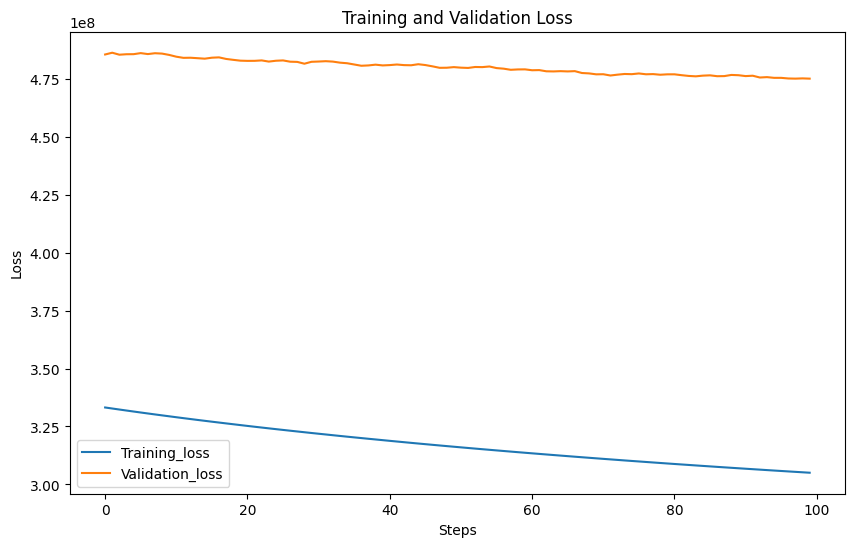

In [193]:
# Create figure and axis
plt.figure(figsize=(10, 6))

# Plot train/val lsos


sns.lineplot(x=*10range(len(train_scores_history)), y=train_scores_history, label="Training_loss")

sns.lineplot(x=10*range(len(val_scores_history)), y=val_scores_history, label="Validation_loss")

                 
# Set plot labels and title
plt.xlabel('Steps')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')

# Show legend
plt.legend()

# Show plot
plt.show()

In [194]:
#make a prediction
pred = model.predict(pre_test_df.copy())

In [195]:
#convert to a datframe and assign the id
pred = pd.DataFrame(pred, columns=['SalePrice'], index=pre_test_df.index)
pred['Id'] = pred.index
pred =  pred[['Id', 'SalePrice']]

In [196]:
print(pred)

        Id      SalePrice
Id                       
1461  1461  143488.492991
1462  1462  158743.041932
1463  1463  166396.006286
1464  1464  175419.587162
1465  1465  210928.823997
...    ...            ...
2915  2915   87611.921290
2916  2916   71927.004452
2917  2917  150091.540725
2918  2918  118321.334477
2919  2919  212261.321776

[1459 rows x 2 columns]


In [197]:
#save prediction to csv
filename = 'submission.csv'
save_path = os.path.join(os.getcwd(), filename)
print(save_path)
pred.to_csv(save_path, index=False)


C:\Users\AliMu\Programming Projects\DataScience\House Prices\submission.csv
